### 1.1 Give a general description of the database, including size, data types, null/blank values, outliers, atypical values.

In [1]:
# Import libraries 

import pandas as pd  # For data manipulation
import numpy as np   # For numerical calculations

# Import csv archive

df = pd.read_csv("SEER Breast Cancer Dataset .csv")

# Good practice: Glance of the dataframe
df

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,69,White,Divorced,NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,74,Positive,Positive,12,1,83,Dead
4020,69,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,16,Positive,Positive,12,6,85,Dead
4021,69,White,Single (never married),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,55,Positive,Positive,13,2,86,Dead
4022,69,NaN,Married (including common law),NaN,T1,N2,IIIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,21,9,88,Dead


#### General Description

##### Column names

In [2]:
df.keys()

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

##### Size

In [3]:
df.shape

(4024, 16)

##### Data Types

In [4]:
# Displays the data types of each column
# df.dtypes

df.dtypes

Age                         int64
Race                       object
Marital Status             object
Unnamed: 3                float64
T Stage                    object
N Stage                    object
6th Stage                  object
Grade                      object
A Stage                    object
Tumor Size                  int64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined      int64
Regional Node Positive      int64
Survival Months             int64
Status                     object
dtype: object

##### Null/Blank Values

In [5]:
# Check for null values in all columns
null_counts = df.isnull().sum()

print(null_counts[null_counts > 0])


Race            13
Unnamed: 3    4024
dtype: int64


##### Outliers

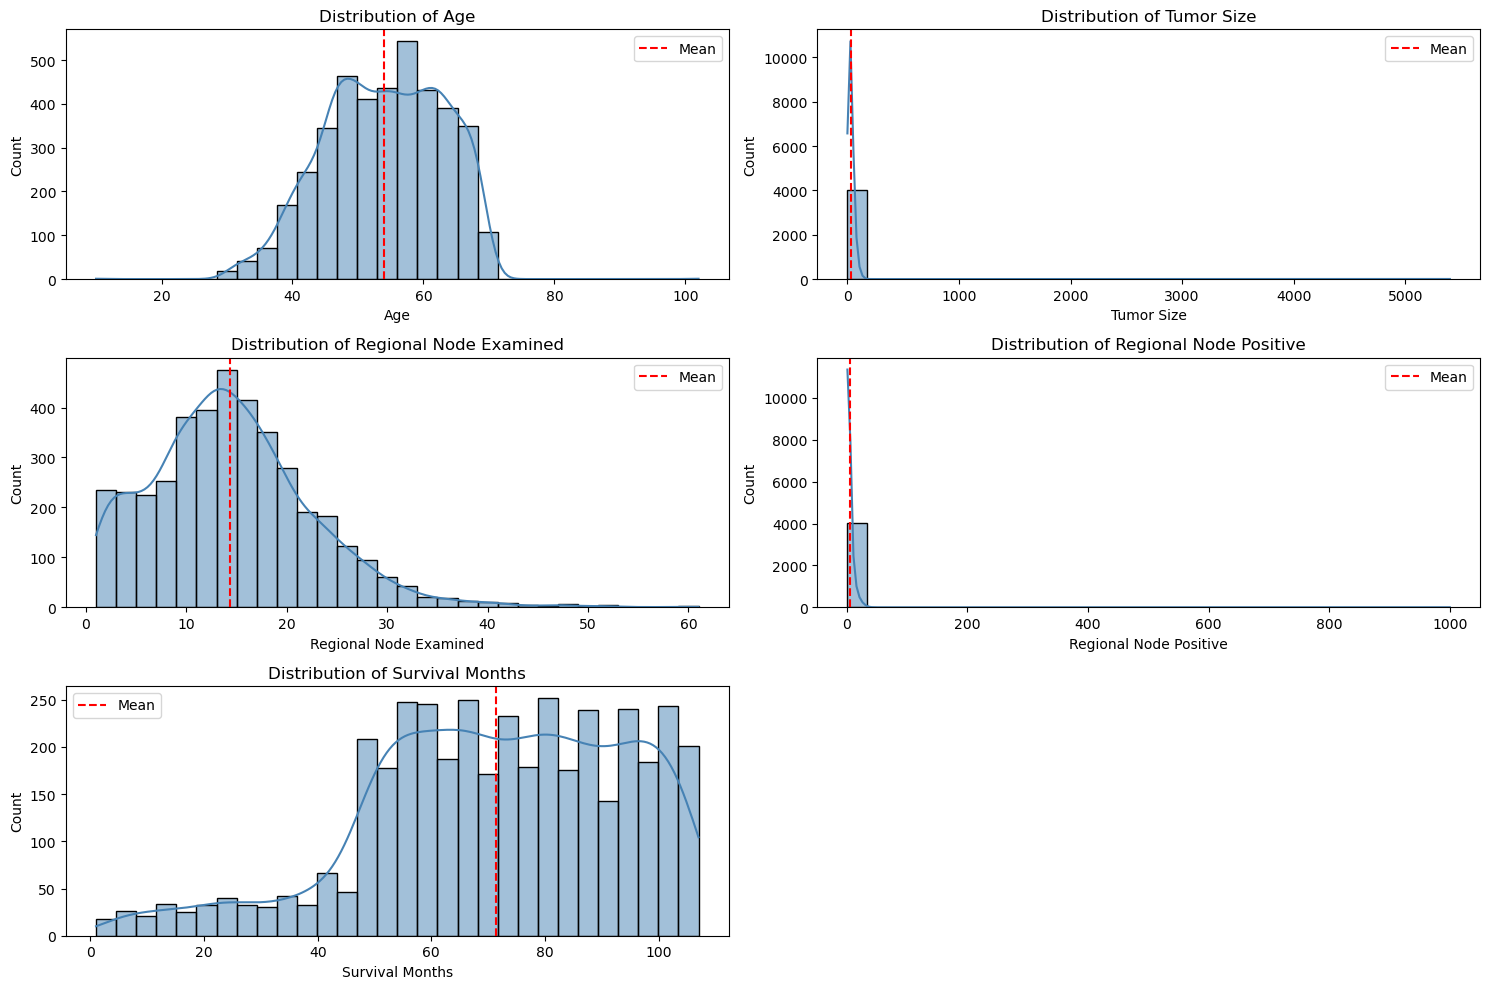

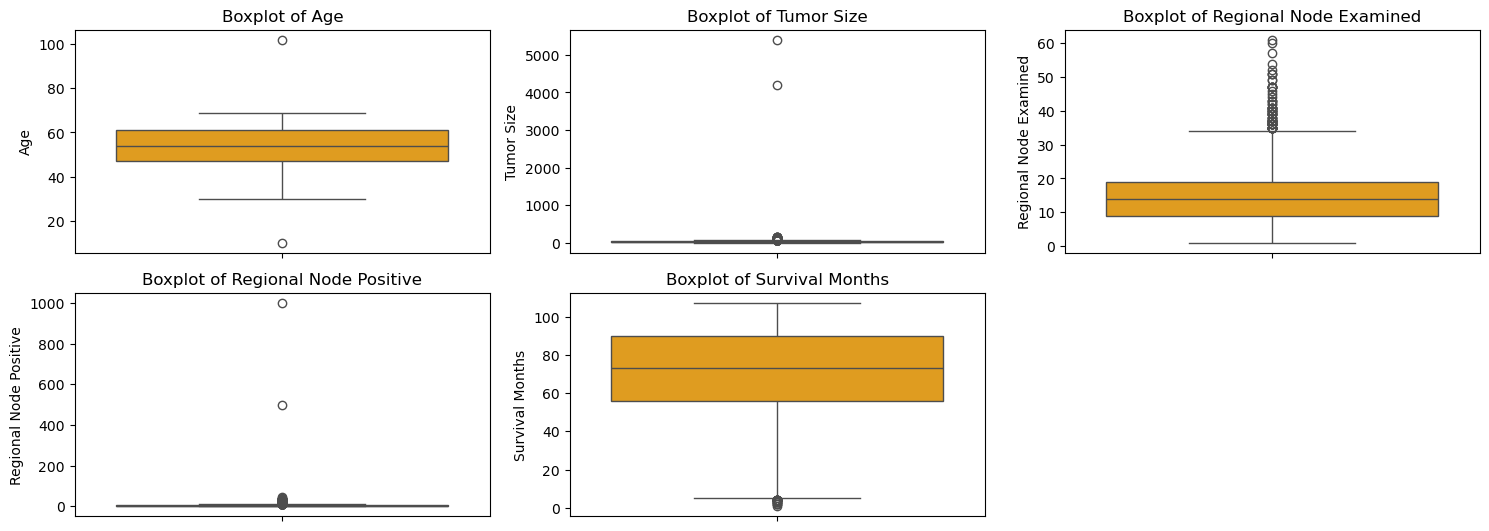

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_distributions(df, numerical_vars):
    """Plot histograms with KDE for numerical variables"""
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 2, i)
        sns.histplot(df[var].dropna(), kde=True, bins=30, color='steelblue')
        plt.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f"Distribution of {var}")
        plt.xlabel(var)
        plt.legend()
    plt.tight_layout()
    plt.show()


def plot_numerical_boxplots(df, numerical_vars):
    """Plot boxplots for numerical variables"""
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 3, i)
        sns.boxplot(y=df[var], color='orange')
        plt.title(f"Boxplot of {var}")
    plt.tight_layout()
    plt.show()

numerical_vars = [
    "Age", "Tumor Size", "Regional Node Examined",
    "Regional Node Positive", "Survival Months"
]

plot_numerical_distributions(df, numerical_vars)
plot_numerical_boxplots(df, numerical_vars)

Skewness of numerical variables:
Age                       -0.205614
Unnamed: 3                      NaN
Tumor Size                43.321396
Regional Node Examined     0.828965
Regional Node Positive    45.268467
Survival Months           -0.589778
dtype: float64


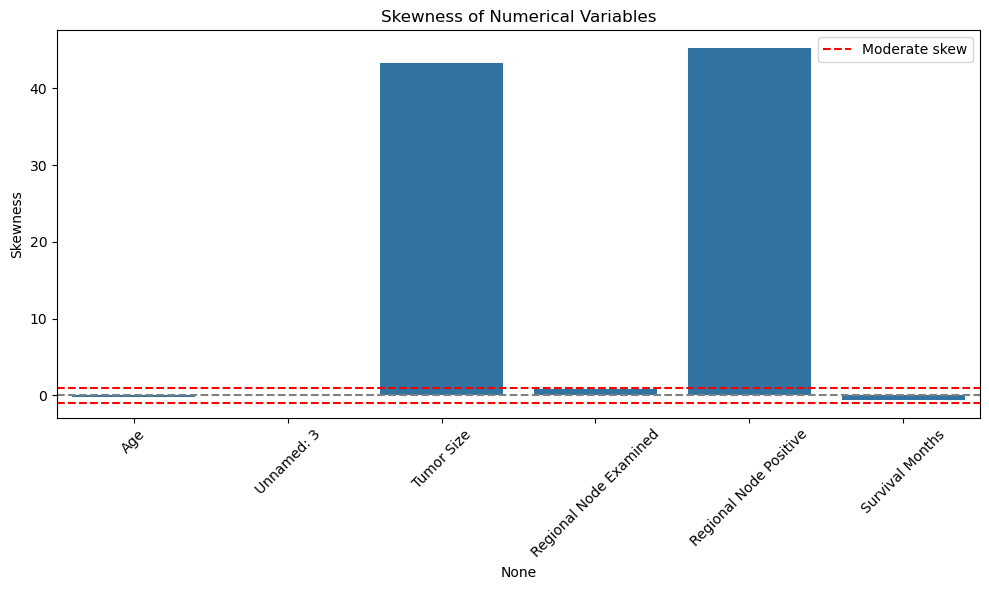

In [7]:
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Calculate skewness
skewness = df[numerical_cols].apply(skew)

# Display skewness values
print("Skewness of numerical variables:")
print(skewness)

# Optional: visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Moderate skew')
plt.axhline(-1, color='red', linestyle='--')
plt.title("Skewness of Numerical Variables")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Skewness measures the asymmetry of a distribution. A skewness value close to zero indicates a symmetric distribution, which resembles the shape of a normal curve. Values between -0.5 and 0.5 are generally considered approximately symmetric, while values between -1 and -0.5 or 0.5 and 1 indicate moderate skewness. When the skewness is less than -1 or greater than 1, the distribution is considered highly skewed. Positive skewness means the right tail is longer (common in variables like income or survival time), while negative skewness indicates a longer left tail.

In [8]:
import numpy as np

def medcouple(x):
    x = np.sort(x)
    n = len(x)
    if n == 0:
        return np.nan
    median = np.median(x)
    
    # Split data into left and right of the median
    xl = x[x <= median]
    xu = x[x >= median]
    
    # Create all possible pairwise differences
    def h(i, j):
        return (xu[j] + xl[i] - 2 * median) / (xu[j] - xl[i]) if xu[j] != xl[i] else np.sign(xu[j] + xl[i] - 2 * median)
    
    h_values = np.array([h(i, j) for i in range(len(xl)) for j in range(len(xu))])
    
    return np.median(h_values)

In [9]:
import numpy as np
import pandas as pd


def adjusted_boxplot_outliers(df, columns):
    outliers = {}

    for col in columns:
        x = df[col].dropna().astype(float).values
        x_sorted = np.sort(x)

        # Compute quartiles and IQR
        Q1 = np.percentile(x_sorted, 25)
        Q3 = np.percentile(x_sorted, 75)
        IQR = Q3 - Q1

        # Compute robust skewness (medcouple)
        mc = medcouple(x_sorted)

        # Adjust fences according to skewness
        if mc >= 0:
            lower_fence = Q1 - 1.5 * np.exp(-4 * mc) * IQR
            upper_fence = Q3 + 1.5 * np.exp(3 * mc) * IQR
        else:
            lower_fence = Q1 - 1.5 * np.exp(-3 * mc) * IQR
            upper_fence = Q3 + 1.5 * np.exp(4 * mc) * IQR

        # Find outliers
        mask = (x < lower_fence) | (x > upper_fence)
        outliers[col] = df.loc[mask, col]

    return outliers


columns_to_check = ["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]
outliers = adjusted_boxplot_outliers(df, columns_to_check)

for col, values in outliers.items():
    print(f"\nAdjusted Boxplot Outliers in {col}:\n{values}")


Adjusted Boxplot Outliers in Age:
0        10
4023    102
Name: Age, dtype: int64

Adjusted Boxplot Outliers in Tumor Size:
118       2
165       6
235       3
278       5
461       0
       ... 
3942      5
3958      4
3970      6
3975      6
3996    130
Name: Tumor Size, Length: 105, dtype: int64

Adjusted Boxplot Outliers in Regional Node Examined:
134     36
160     37
246     40
253     40
312     47
        ..
3733    47
3770    36
3919    35
3948    37
4005    47
Name: Regional Node Examined, Length: 72, dtype: int64

Adjusted Boxplot Outliers in Regional Node Positive:
233     1000
1083     500
1320      33
1464      32
1582      37
2314      41
2528      34
2657      32
2814      37
3433      33
3564      46
3625      34
3724      35
Name: Regional Node Positive, dtype: int64

Adjusted Boxplot Outliers in Survival Months:
381    1
Name: Survival Months, dtype: int64


##### Atypical values

In [10]:
# Select all object-type (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns

# Tabulate counts and proportions for each
for col in categorical_cols:
    print(f"\n")
    
    # Create count and proportion series
    counts = df[col].value_counts(dropna=False)
    proportions = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combine into a DataFrame
    summary = pd.DataFrame({'Count': counts, 'Proportion (%)': proportions.round(2)})
    print(summary)



                                                    Count  Proportion (%)
Race                                                                     
White                                                3402           84.54
Other (American Indian/AK Native, Asian/Pacific...    319            7.93
Black                                                 290            7.21
NaN                                                    13            0.32


                                Count  Proportion (%)
Marital Status                                       
Married (including common law)   2643           65.68
Single (never married)            615           15.28
Divorced                          486           12.08
Widowed                           235            5.84
Separated                          41            1.02
Split up                            4            0.10


          Count  Proportion (%)
T Stage                        
T2         1786           44.38
T1         1603       

In [11]:
# Get unique values for all columns
unique_values = df.apply(lambda col: col.unique())

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}':\n{values}\n")


Unique values in 'Age':
[ 10  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69 102]

Unique values in 'Race ':
['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black' nan]

Unique values in 'Marital Status':
['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated' 'Split up']

Unique values in 'Unnamed: 3':
[nan]

Unique values in 'T Stage ':
['T1' 'T2' 'T3' 'T4']

Unique values in 'N Stage':
['N1' 'N2' 'N3']

Unique values in '6th Stage':
['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']

Unique values in 'Grade':
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'
 'jluky' 'cfjfdit' 'ijkhliuy' 'cfhgdk' 'jjjjj']

Unique values in 'A Stage':
['Regional' 'Distant']

Unique values in 'Tumor Size':
[   9   28   25   42   30   65   80   10   45

In [12]:
# Get descriptive statistics for integer variables
print(df[["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]].describe())


               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.975398    32.834742               14.357107   
std       9.010704   109.217549                8.099675   
min      10.000000     0.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max     102.000000  5400.000000               61.000000   

       Regional Node Positive  Survival Months  
count             4024.000000      4024.000000  
mean                 4.529324        71.297962  
std                 18.264337        22.921430  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max               1000.000000       107.000000  


In [13]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print number of duplicates and optionally show them
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows.head())

Number of duplicate rows: 1
      Age  Race                   Marital Status  Unnamed: 3 T Stage  N Stage  \
2760   63  White  Married (including common law)         NaN       T1      N1   

     6th Stage                                Grade   A Stage  Tumor Size  \
2760       IIA  Moderately differentiated; Grade II  Regional          17   

     Estrogen Status Progesterone Status  Regional Node Examined  \
2760        Positive            Positive                       9   

      Regional Node Positive  Survival Months Status  
2760                       1               56  Alive  


In [14]:
# Identify atypical cases where Regional Node Positive > Regional Node Examined
atypical_df = df[df["Regional Node Positive"] > df["Regional Node Examined"]]

# Display the extracted DataFrame
print("Atypical Cases where Regional Node Positive > Regional Node Examined:\n")
print(atypical_df)


Atypical Cases where Regional Node Positive > Regional Node Examined:

      Age  Race                   Marital Status  Unnamed: 3 T Stage  N Stage  \
233    40  White  Married (including common law)         NaN       T3      N1   
1083   49  White  Married (including common law)         NaN       T3      N2   

     6th Stage                                Grade   A Stage  Tumor Size  \
233       IIIA  Moderately differentiated; Grade II  Regional          60   
1083      IIIA  Moderately differentiated; Grade II  Regional          52   

     Estrogen Status Progesterone Status  Regional Node Examined  \
233         Negative            Negative                      17   
1083        Positive            Negative                      32   

      Regional Node Positive  Survival Months Status  
233                     1000               89  Alive  
1083                     500               68  Alive  


### Observations: 

#### Data Cleaning Issues

##### 1. Blank Spaces in Variable Names  
Variable names contain blank spaces, which should be removed or replaced with underscores to ensure consistency and ease of access during data manipulation.

##### 2. Null Values  
The "Race" variable contains null values that need to be addressed. Depending on their frequency and distribution, they can be imputed or removed.

##### 3. Unnamed Blank Column  
"Unnamed: 3" is an empty column with no relevant data and should be removed from the dataset.

##### 4. Category Name Simplification  
The following categorical variables contain unnecessarily complex or verbose names that should be simplified to enhance interpretability and consistency:  
Marital Status, Race, Grade.

##### 5. Feature Scaling  
Numerical features such as Tumor Size, Age, and Survival Months should be standardized using z-score normalization to improve comparability across features. This is especially important for machine learning models sensitive to feature scale (James et al., 2013).

##### 6. Duplicate Entries  
1 duplicate record was found and should be removed to avoid bias in model training.

##### 7. Logical Checks in Regional Node Examined > Regional Node Positive  
2 records violate the logical condition where the number of positive lymph nodes exceeds the number of examined nodes. These are logically inconsistent and should be corrected or removed.

####

#### Categorical Variable Handling

##### 1. Confirmed Categorical Variables  
The following variables are categorical and should be properly encoded for model compatibility:  
Marital Status, Race, Grade, T Stage, N Stage, 6th Stage, A Stage, Estrogen Status, Progesterone Status, Status.

##### 2. Inconsistent Categories in "Grade"  
The "Grade" variable contains invalid or nonsensical categories (e.g., "jluky", "cfjfdit") that should be corrected or removed prior to encoding.

##### 3. Encoding of Categorical Variables  
Categorical variables must be encoded based on their type: Nominal or Ordinal.

- **Nominal variables** (e.g., *Race*, *Marital Status*, *Estrogen Status*) should be transformed using one-hot encoding to avoid introducing any ordinal relationships.
- **Ordinal variables** (e.g., *T Stage*, *N Stage*, *6th Stage*, *Grade*, *A Stage*) should be mapped to integers that reflect their clinical severity or stage progression.
- **Status**, the response variable, should be encoded appropriately for classification.

##### 4. Category Simplification  
- Progesterone Status (Positive, Negative, Neutral) should be reduced to (Positive, Negative).  
- Status (Dead, Alive, Not Dead) should be standardized to (Dead, Alive) for binary classification or mapped consistently if treated as multiclass.

####

#### Outlier Detection and Handling

##### 1. Atypical Values in Regional Node Positive  
Several cases have Regional Node Positive values greater than Regional Node Examined, which is a logical error and should be addressed accordingly.

##### 2. Outliers in Age  
Two outlier values were identified: 10 (minimum) and 102 (maximum). These should be reviewed in the context of clinical plausibility.

##### 3. Outliers in Tumor Size  
A total of 224 outliers exceed 80 mm, with an extreme value of 5400 mm, significantly skewing the mean of 33. These values should be investigated for data entry errors.

##### 4. Outliers in Regional Node Examined  
72 outlier cases were identified with values between 35 and 47, which are unusually high and warrant verification.

##### 5. Outliers in Regional Node Positive  
346 outliers were detected with values ranging from 12 to 26. These should be assessed for clinical validity.

##### 6. Outliers in Survival Months  
19 records show survival times between 1 and 4 months. While potentially valid, these cases are statistical outliers and should be reviewed in context.

####


### 1.2 Detail the criteria used to detect outliers. How where the outliers, null values, and atypical values handled (if applicable): What was done with them? Why? Add references to justify the cleaning process.

#### Detection of Outliers

An outlier is an observation, which so much deviates from other observations as to arouse suspicions that it was generated by a different mechanism (D.M. Hawkins, 1980 on Manoj & Senthamarai, 2013, pg. 709). 
Outliers in numerical variables were identified using the Interquartile Range (IQR) method and the adjusted boxplot method. Skewness was evaluated for each variable, and since several showed skewed distributions, both methods were applied. The IQR method flags values outside Q1 – 1.5×IQR and Q3 + 1.5×IQR. The adjusted boxplot, which accounts for skewness using the medcouple statistic, provides more accurate outlier detection in asymmetric distributions (Songwon, 2002, pg. 13-16).


##### Tumor Size: 
The maximum tumor size of 5400 mm is biologically implausible since 'a tumor larger than 10cm (100mm) is called a giant tumor' and extreme cases of breast cancer (Phyllodes Tumor) have reported maximum values of 30cm (300mm) (Schillebeeckx et al., 2016). This suggests a possible data entry error. 
##### Regional Node Examined: 
Outliers (values 35–47) were identified. 'The number of nodes needed to be dissected for stages T1, T2, and T3 are 8, 37, and 87, respectively. Nodal examination is not recommended for stages pT3 and pT4 based on the prevalence of nodal invasion.' (Sun et al., 2020)
##### Regional Node Positive: 
The presence of 346 outliers (values 12–26) suggests cases where the number of positive nodes was abnormally high, possibly affecting prognostic models. The maximum number of regional node positive of 1000 is biologically and logically implausible. Regional node positive < Regional node examined, and max regional node examined is 61.
##### Survival Months: 
Extremely low survival times (1–4 months) may represent misclassifications or aggressive disease stages, requiring careful evaluation. Key factors for short survival include triple-negative tumors, short disease-free intervals (DFI), and visceral metastasis (liver or brain), with some patients surviving only 4–7 months. In contrast, those receiving salvage treatment and with more favorable tumor characteristics had longer survival, with some reaching up to 87 months (Kim et al., 2013). These extremes highlight important outliers in survival data.
##### Age: 
Unusual values (10 and 102 years) may represent rare cases but require validation. The US Centers for Disease and Control Prevention report less than 16 cases of breast cancer per 100 000 women in the US for the ages < 15 during the periods 2017-2021 and 2021 respectively. For ages 85+, there is a rate 300 cases per 100 000 women, meaning it is a relevant group age. There have been documented cases of breast cancer in girls aged <10 (Gohara et al. 2020)

####

#### Handling of Outliers

The strategy for handling outliers was tailored to the nature of each variable. Initially, biologically implausible values were removed before applying any statistical methods. This ensured that extreme, likely erroneous values did not distort the identification of genuine outliers.

##### Tumor Size:  
The two most extreme values—5400 mm and 4200 mm—were removed due to their biological implausibility. According to the literature,  'tumors larger than 10 cm are called a giant' and tumors larger than 300 mm (30 cm) are already considered extreme cases (Schillebeeckx et al., 2016), making these two values clear input errors. After their removal, outlier detection was re-applied using the Interquartile Range (IQR) and adjusted boxplot methods. Winsorization was then applied only if necessary to reduce the influence of remaining extreme but plausible values.

##### Regional Node Positive:  
Two entries with values of 1000 and 500 were removed as they violate biological plausibility and clinical logic: the number of positive lymph nodes cannot exceed the number of nodes examined, whose maximum observed value is 61. Once these values were excluded, outlier detection was performed again, and winsorization was applied if needed to control for remaining high but valid values.

##### Regional Node Examined:  
Outliers identified in the range of 35–47 nodes were evaluated in the context of clinical standards. While high, these values can be plausible in extended lymph node dissection procedures, particularly in advanced cancer stages. Therefore, no values were removed. However, due to their potential influence on model performance, winsorization was applied at the 1st and 99th percentiles to reduce the effect of extreme but valid counts.

##### Age:  
Outlier values at the lower (10 years) and upper (102 years) extremes were retained after verifying their biological plausibility. Although rare, breast cancer has been documented in children under 10 (Gohara et al., 2020), and incidence in adults aged 85+ is clinically significant. As these cases may represent specific clinical subgroups, no transformation or removal was applied. 

##### Survival Months:  
Survival durations between 1 and 4 months were flagged as outliers using both the IQR and adjusted boxplot methods. These values were not removed, as they could reflect aggressive disease courses, late-stage diagnosis, or rapid progression, all of which are clinically meaningful. 

####

In medical research, not all outliers should be removed, as they may represent meaningful clinical phenomena. According to Pilowsky et al. (2024), outliers can be classified as error, random, or interesting. While error outliers—such as biologically implausible values—should be corrected or removed, interesting outliers may reflect rare but real clinical cases and thus offer insights into subgroups or exceptional disease progressions. Retaining such values, particularly in clinical datasets, supports the integrity of subgroup analyses and helps uncover important patterns in extreme but plausible patient outcomes.

#

#### Handling of Null Values

Null values were observed only in the "Race" variable, and were addressed using appropriate imputation methods based on data distribution and proportion of missing entries.

##### Race:  
The "Race" variable contained 0.32% missing values. These were imputed using mode imputation, justified by the fact that the dataset shows a dominant racial category and the proportion of missing values is minimal. This approach maintains the original distribution while preserving sample size (Little & Rubin, 2019).


####

#### Handling of Atypical Values

Some variables contained unexpected or incorrect categorical entries:

##### Grade: 
The presence of nonsensical values (e.g., "jluky", "cfjfdit") suggests data entry errors. These values were removed as there is no clear criterion as to which of the existing categories these belong and they represent 0,2% per category, they are not substantial so they can be removed. 
##### Progesterone Status: 
According to ASCO and CAP guidelines, progesterone receptor (PR) status is positive if ≥1% of tumor nuclei are immunoreactive and negative if <1%; a "neutral" category is not recognized (Allison et al., 2020). This suggests that any such label in the dataset likely results from ambiguous testing, reporting variations, or data entry inconsistencies. Neutral represents 0,12% of the entries for the variable, which is not substantial and can be removed.
##### Status:
The presence of three categories—Alive, Dead, and Not Dead—in the Status variable likely reflects inconsistent labeling, as "Not Dead" appears to be a redundant or mislabeled version of "Alive." To ensure clarity and consistency in analysis, it would be appropriate to merge "Not Dead" with "Alive" into a single category, resulting in a standard binary classification: "Alive" and "Dead."


####

#### Data Clean Issues

In [15]:
# Blank spaces in variable names
df.columns = [col.rstrip() for col in df.columns]

# Unnamed 3 is a blank column
df.drop('Unnamed: 3', axis=1, inplace=True)

# Marital, T stage, N stage and 6th stage are categorical
# A stage, Estrogen status, Progesterone status and Status are categorical 
df["Race"] = df["Race"].astype("category")  # Contains null values
df["Marital Status"] = df["Marital Status"].astype("category")
df["T Stage"] = df["T Stage"].astype("category")
df["N Stage"] = df["N Stage"].astype("category")
df["6th Stage"] = df["6th Stage"].astype("category")
df["A Stage"] = df["A Stage"].astype("category")
df["Estrogen Status"] = df["Estrogen Status"].astype("category")
df["Status"] = df["Status"].astype("category")

# Category names of variable Race can be simplified
df['Race'] = df['Race'].replace({
    'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other'
})

df['Marital Status'] = df['Marital Status'].replace({
    'Married (including common law)': 'Married',
    'Single (never married)': 'Single',
    'Split up': 'Separated'
})

df['Status'] = df['Status'].replace({
    'Not dead': 'Alive',     # If 'Not dead' should be treated the same
    'Alive': 'Alive',
    'Dead': 'Dead'
})

# Grade is categorical but has some inconsistent, nonsensical categories 

df['Grade'] = df['Grade'].replace({
    'Well differentiated; Grade I': 'Grade I',
    'Moderately differentiated; Grade II': 'Grade II',
    'Poorly differentiated; Grade III': 'Grade III',
    'Undifferentiated; anaplastic; Grade IV': 'Grade IV'
})

df['Progesterone Status'] = df['Progesterone Status'].replace({
    'Positive': 'Positive',
    'Negative': 'Negative',
})

if 'Progesterone Status' in df.columns:
    valid_ps = ['Positive', 'Negative']  # Define valid grade categories
    df = df[df['Progesterone Status'].isin(valid_ps)]  # Keep only valid grades

df["Progesterone Status"] = df["Progesterone Status"].astype("category")

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

/var/folders/7g/1byh3lx56tzf7ql8nr3lggsr0000gp/T/ipykernel_12974/1560877436.py:19: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Race'] = df['Race'].replace({
/var/folders/7g/1byh3lx56tzf7ql8nr3lggsr0000gp/T/ipykernel_12974/1560877436.py:23: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital Status'] = df['Marital Status'].replace({
/var/folders/7g/1byh3lx56tzf7ql8nr3lggsr0000gp/T/ipykernel_12974/1560877436.py:29: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will 

#### Handling of outliers

In [16]:
# Remove implausible Tumor Size values
implausible_tumor_sizes = [5400, 4200]
df = df[~df['Tumor Size'].isin(implausible_tumor_sizes)]
print(f"Removed records with Tumor Size in {implausible_tumor_sizes}")

# Remove implausible Regional Node Positive values
implausible_node_positive = [1000, 500]
df = df[~df['Regional Node Positive'].isin(implausible_node_positive)]
print(f"Removed records with Regional Node Positive in {implausible_node_positive}")

# Regional Node Positive should not exceed Regional Node Examined
if 'Regional_Node_Positive' in df.columns and 'Regional_Node_Examined' in df.columns:
    df.loc[df['Regional_Node_Positive'] > df['Regional_Node_Examined'], 'Regional_Node_Positive'] = df['Regional_Node_Examined']



Removed records with Tumor Size in [5400, 4200]
Removed records with Regional Node Positive in [1000, 500]


In [17]:
import numpy as np
import pandas as pd

def adjusted_boxplot_outliers(df, columns):
    outliers = {}

    for col in columns:
        x = df[col].dropna().astype(float).values
        x_sorted = np.sort(x)

        # Compute quartiles and IQR
        Q1 = np.percentile(x_sorted, 25)
        Q3 = np.percentile(x_sorted, 75)
        IQR = Q3 - Q1

        # Compute robust skewness (medcouple)
        mc = medcouple(x_sorted)

        # Adjust fences according to skewness
        if mc >= 0:
            lower_fence = Q1 - 1.5 * np.exp(-4 * mc) * IQR
            upper_fence = Q3 + 1.5 * np.exp(3 * mc) * IQR
        else:
            lower_fence = Q1 - 1.5 * np.exp(-3 * mc) * IQR
            upper_fence = Q3 + 1.5 * np.exp(4 * mc) * IQR

        # Find outliers
        mask = (x < lower_fence) | (x > upper_fence)
        outliers[col] = df.loc[mask, col]

    return outliers


columns_to_check = ["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]
outliers = adjusted_boxplot_outliers(df, columns_to_check)

for col, values in outliers.items():
    print(f"\nAdjusted Boxplot Outliers in {col}:\n{values}")



Adjusted Boxplot Outliers in Age:
0        10
4017    102
Name: Age, dtype: int64

Adjusted Boxplot Outliers in Tumor Size:
118       2
165       6
235       3
278       5
461       0
       ... 
3936      5
3952      4
3964      6
3969      6
3990    130
Name: Tumor Size, Length: 103, dtype: int64

Adjusted Boxplot Outliers in Regional Node Examined:
134     36
160     37
246     40
253     40
312     47
        ..
3727    47
3764    36
3913    35
3942    37
3999    47
Name: Regional Node Examined, Length: 72, dtype: int64

Adjusted Boxplot Outliers in Regional Node Positive:
1318    33
1461    32
1578    37
2309    41
2523    34
2652    32
2808    37
3427    33
3558    46
3619    34
3718    35
Name: Regional Node Positive, dtype: int64

Adjusted Boxplot Outliers in Survival Months:
381    1
Name: Survival Months, dtype: int64


In [18]:
import numpy as np
import pandas as pd


# Columns to process
columns_to_winsorize = ["Tumor Size", "Regional Node Examined", "Regional Node Positive"]

# Adjusted boxplot winsorization function
def winsorize_adjusted_boxplot(df, column):
    x = df[column].dropna().astype(float)  # Convert to float to avoid medcouple error
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    mc = medcouple(np.sort(x))  # Compute medcouple (robust skewness)

    # Compute adjusted fences based on skewness
    if mc >= 0:
        lower_bound = q1 - 1.5 * np.exp(-4 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(3 * mc) * iqr
    else:
        lower_bound = q1 - 1.5 * np.exp(-3 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(4 * mc) * iqr

    # Apply winsorization (clipping)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    print(f"{column}: Applied adjusted boxplot winsorization")
    return df

# Apply winsorization to specified columns
for col in columns_to_winsorize:
    df = winsorize_adjusted_boxplot(df, col)

# Enforce logical condition: Regional Node Positive ≤ Regional Node Examined
invalid_logic = df[df["Regional Node Positive"] > df["Regional Node Examined"]]
print(f"Found {len(invalid_logic)} records with Regional Node Positive > Examined. Correcting...")

df.loc[df["Regional Node Positive"] > df["Regional Node Examined"], "Regional Node Positive"] = \
    df["Regional Node Examined"]

print("Logical condition enforced: Regional Node Positive ≤ Regional Node Examined.\n")



Tumor Size: Applied adjusted boxplot winsorization
Regional Node Examined: Applied adjusted boxplot winsorization
Regional Node Positive: Applied adjusted boxplot winsorization
Found 0 records with Regional Node Positive > Examined. Correcting...
Logical condition enforced: Regional Node Positive ≤ Regional Node Examined.



In [19]:
df.shape

(4014, 15)

In [20]:
# Identify atypical cases where Regional Node Positive > Regional Node Examined
atypical_df = df[df["Regional Node Positive"] > df["Regional Node Examined"]]

# Display the extracted DataFrame
print("Atypical Cases where Regional Node Positive > Regional Node Examined:\n")
print(atypical_df)


Atypical Cases where Regional Node Positive > Regional Node Examined:

Empty DataFrame
Columns: [Age, Race, Marital Status, T Stage, N Stage, 6th Stage, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Regional Node Positive, Survival Months, Status]
Index: []


In [21]:
# Get descriptive statistics for integer variables
print(df[["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]].describe())

               Age   Tumor Size  Regional Node Examined  \
count  4014.000000  4014.000000             4014.000000   
mean     53.980319    30.452391               14.227703   
std       9.016742    20.867673                7.675188   
min      10.000000     6.231956                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max     102.000000   120.232536               34.000000   

       Regional Node Positive  Survival Months  
count             4014.000000      4014.000000  
mean                 4.152913        71.327105  
std                  5.046596        22.920699  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 31.890134       107.000000  


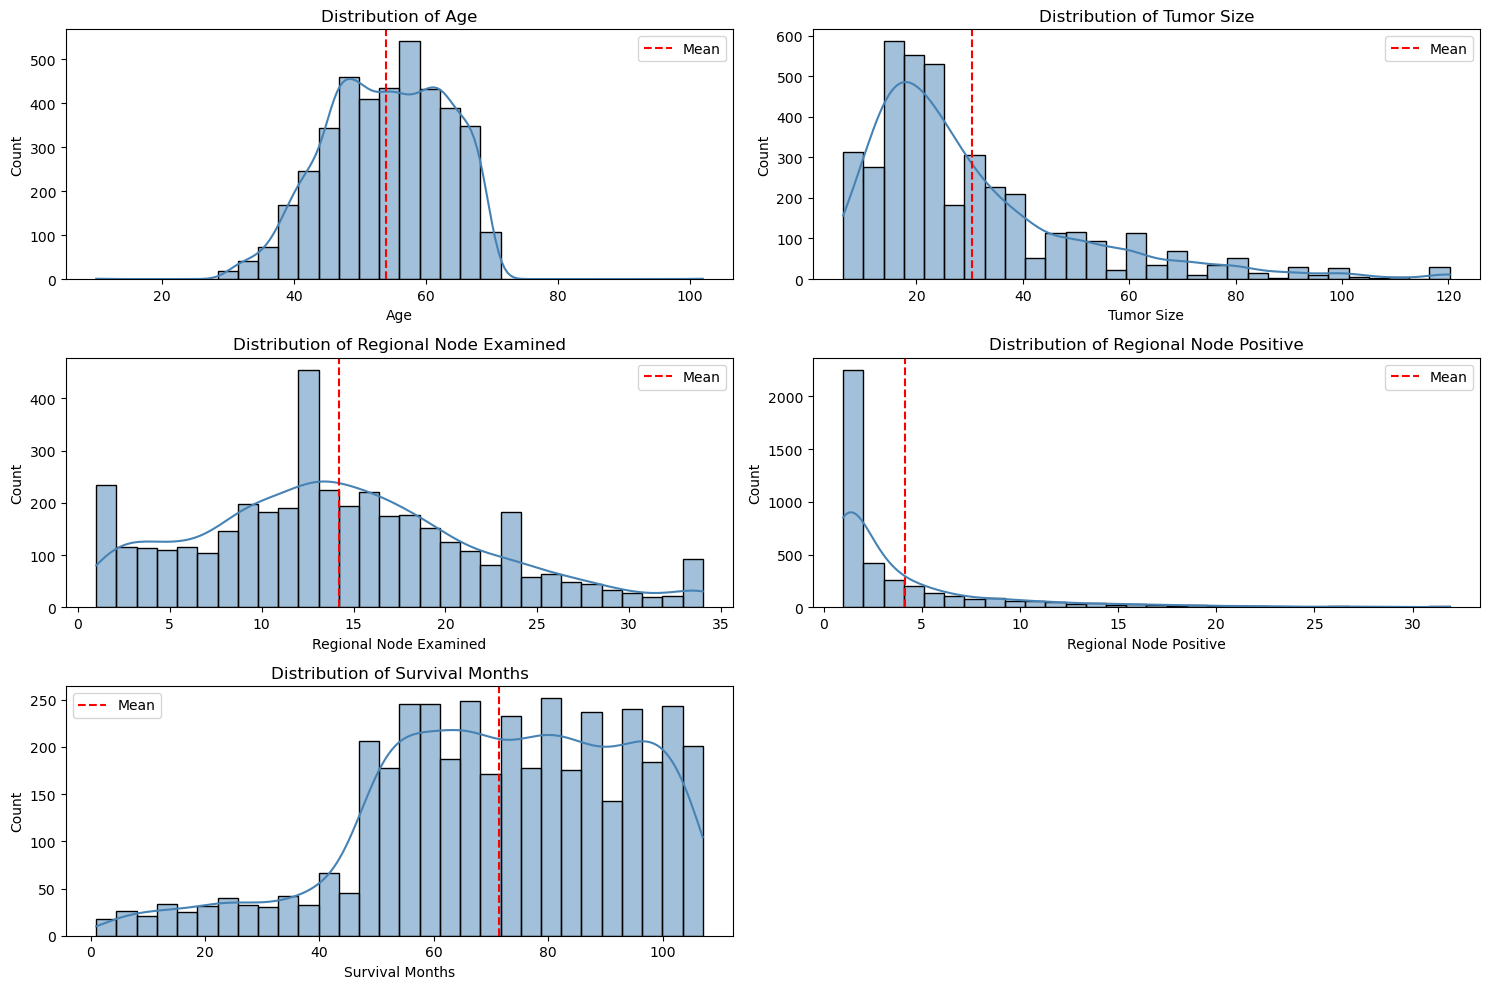

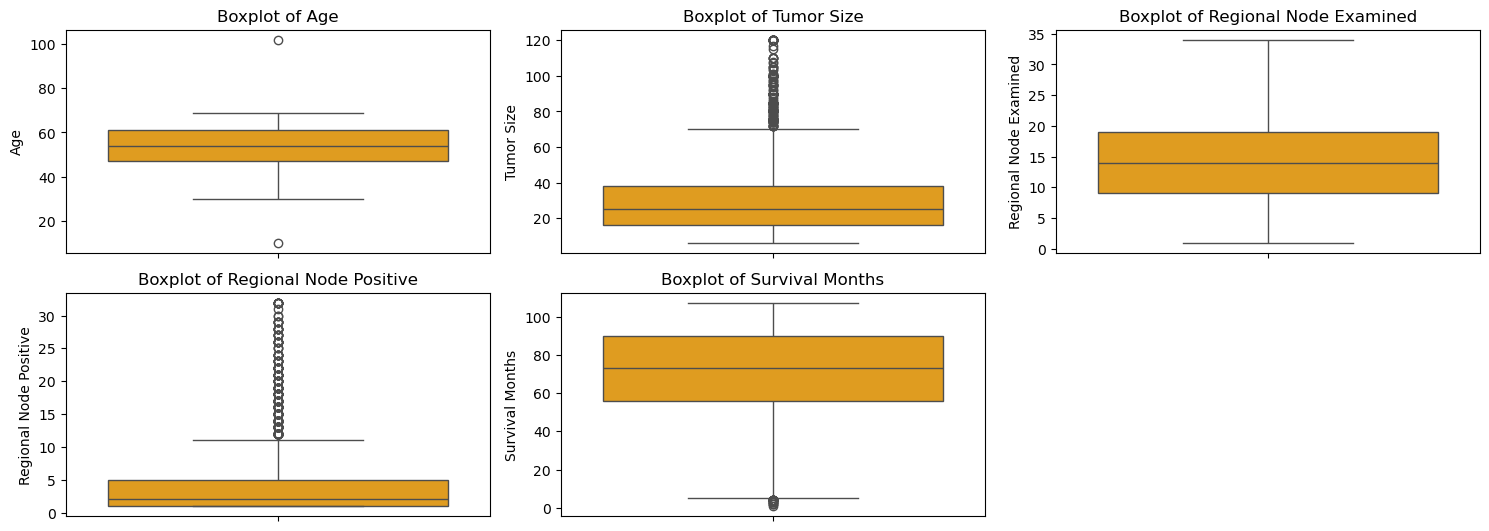

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_distributions(df, numerical_vars):
    """Plot histograms with KDE for numerical variables"""
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 2, i)
        sns.histplot(df[var].dropna(), kde=True, bins=30, color='steelblue')
        plt.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f"Distribution of {var}")
        plt.xlabel(var)
        plt.legend()
    plt.tight_layout()
    plt.show()


def plot_numerical_boxplots(df, numerical_vars):
    """Plot boxplots for numerical variables"""
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 3, i)
        sns.boxplot(y=df[var], color='orange')
        plt.title(f"Boxplot of {var}")
    plt.tight_layout()
    plt.show()

numerical_vars = [
    "Age", "Tumor Size", "Regional Node Examined",
    "Regional Node Positive", "Survival Months"
]

plot_numerical_distributions(df, numerical_vars)
plot_numerical_boxplots(df, numerical_vars)


Skewness of numerical variables:
Age                      -0.206518
Tumor Size                1.686022
Regional Node Examined    0.421078
Regional Node Positive    2.555780
Survival Months          -0.591782
dtype: float64


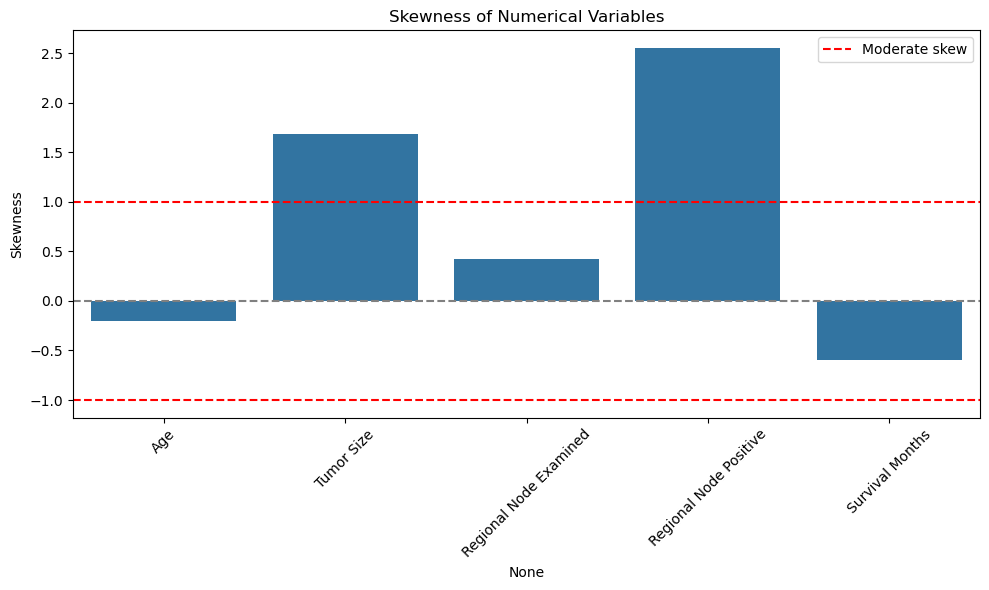

In [23]:
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Calculate skewness
skewness = df[numerical_cols].apply(skew)

# Display skewness values
print("Skewness of numerical variables:")
print(skewness)

# Optional: visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Moderate skew')
plt.axhline(-1, color='red', linestyle='--')
plt.title("Skewness of Numerical Variables")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Handling of Null Values

In [24]:
import pandas as pd
import numpy as np


# 1. Mode imputation for Race
if 'Race' in df.columns:
    mode_value = df['Race'].mode()[0]  # Get most frequent category
    df['Race'].fillna(mode_value, inplace=True)

/var/folders/7g/1byh3lx56tzf7ql8nr3lggsr0000gp/T/ipykernel_12974/2116544227.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Race'].fillna(mode_value, inplace=True)


In [25]:
# Get descriptive statistics for integer variables
print(df[["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]].describe())

               Age   Tumor Size  Regional Node Examined  \
count  4014.000000  4014.000000             4014.000000   
mean     53.980319    30.452391               14.227703   
std       9.016742    20.867673                7.675188   
min      10.000000     6.231956                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max     102.000000   120.232536               34.000000   

       Regional Node Positive  Survival Months  
count             4014.000000      4014.000000  
mean                 4.152913        71.327105  
std                  5.046596        22.920699  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 31.890134       107.000000  


#### Handling of Atypical Values

In [26]:
# 4. Grade: Remove nonsensical values if detected
if 'Grade' in df.columns:
    valid_grades = ['Grade I', 'Grade II', 'Grade III', 'Grade IV']  # Define valid grade categories
    df = df[df['Grade'].isin(valid_grades)]  # Keep only valid grades


In [27]:
# Get descriptive statistics for integer variables
print(df[["Age", "Tumor Size", "Regional Node Examined", 
                    "Regional Node Positive", "Survival Months"]].describe())

               Age   Tumor Size  Regional Node Examined  \
count  4009.000000  4009.000000             4009.000000   
mean     53.973809    30.455201               14.228486   
std       9.017396    20.875462                7.677063   
min      10.000000     6.231956                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max     102.000000   120.232536               34.000000   

       Regional Node Positive  Survival Months  
count             4009.000000      4009.000000  
mean                 4.150360        71.340234  
std                  5.044013        22.901779  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 31.890134       107.000000  


### 1.3 Explore the correlation between all variables. Which variables seem to affect more the response variable and how?

In [28]:
# Ordinal encodings
t_stage_map = {"T1": 1, "T2": 2, "T3": 3, "T4": 4}
n_stage_map = {"N1": 1, "N2": 2, "N3": 3}
stage6_map = {"IIA": 1, "IIB": 2, "IIIA": 3, "IIIB": 4, "IIIC": 5}
grade_map = {"Grade I": 1, "Grade II": 2, "Grade III": 3, "Grade IV": 4}

df["T Stage"] = df["T Stage"].map(t_stage_map)
df["N Stage"] = df["N Stage"].map(n_stage_map)
df["6th Stage"] = df["6th Stage"].map(stage6_map)
df["Grade"] = df["Grade"].map(grade_map).astype('category')

# Target variable: Multiclass encoding
status_map = {'Alive': 0, 'Dead': 1}
df['Status'] = df['Status'].map(status_map)

# Dummy encoding for nominal variables
df = pd.get_dummies(df, columns=[
    "Race", "Marital Status", "A Stage", 
    "Estrogen Status", "Progesterone Status"
], drop_first=True)



In [29]:
print(df.columns)

Index(['Age', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'Tumor Size',
       'Regional Node Examined', 'Regional Node Positive', 'Survival Months',
       'Status', 'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'A Stage_Regional',
       'Estrogen Status_Positive', 'Progesterone Status_Positive'],
      dtype='object')


In [30]:
# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


                                   Age   T Stage   N Stage  6th Stage  \
Age                           1.000000 -0.061927  0.004951  -0.015648   
T Stage                      -0.061927  1.000000  0.277875   0.606666   
N Stage                       0.004951  0.277875  1.000000   0.882268   
6th Stage                    -0.015648  0.606666  0.882268   1.000000   
Grade                        -0.099376  0.132275  0.161871   0.186809   
Tumor Size                   -0.073022  0.812645  0.279672   0.516522   
Regional Node Examined       -0.033969  0.116025  0.330986   0.319962   
Regional Node Positive        0.015934  0.247992  0.844099   0.779881   
Survival Months              -0.009372 -0.085953 -0.139725  -0.144858   
Status                        0.058041  0.156183  0.255943   0.258286   
Race_Other                   -0.082070  0.008074  0.005955   0.013670   
Race_White                    0.094478 -0.004657 -0.028776  -0.027385   
Marital Status_Married       -0.052029 -0.036009 -0

In [31]:
### Unstack and drop self-correlations
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs.drop(labels=[(col, col) for col in correlation_matrix.columns])  # Drop self-correlation

# Sort by absolute value of correlation
corr_pairs = corr_pairs.sort_values(ascending=False)

# Remove duplicates by treating pairs as unordered
corr_pairs = corr_pairs[~corr_pairs.index.duplicated()]

# Show N most strongly correlated pairs
n = 10
top_corrs = corr_pairs.head(n)
bottom_corrs=corr_pairs.tail(n)


print("Top correlated variable pairs:")
print([top_corrs])



Top correlated variable pairs:
[N Stage                 6th Stage                 0.882268
6th Stage               N Stage                   0.882268
N Stage                 Regional Node Positive    0.844099
Regional Node Positive  N Stage                   0.844099
Tumor Size              T Stage                   0.812645
T Stage                 Tumor Size                0.812645
Regional Node Positive  6th Stage                 0.779881
6th Stage               Regional Node Positive    0.779881
T Stage                 6th Stage                 0.606666
6th Stage               T Stage                   0.606666
dtype: float64]


In [32]:
print([bottom_corrs])


[6th Stage               A Stage_Regional         -0.292593
A Stage_Regional        6th Stage                -0.292593
Marital Status_Widowed  Marital Status_Married   -0.344212
Marital Status_Married  Marital Status_Widowed   -0.344212
Survival Months         Status                   -0.476724
Status                  Survival Months          -0.476724
Marital Status_Married  Marital Status_Single    -0.587384
Marital Status_Single   Marital Status_Married   -0.587384
Race_White              Race_Other               -0.694887
Race_Other              Race_White               -0.694887
dtype: float64]


In [33]:
print(correlation_matrix["Status"].head(30).sort_values(ascending=False))

Status                          1.000000
Regional Node Positive          0.258686
6th Stage                       0.258286
N Stage                         0.255943
Grade                           0.160033
T Stage                         0.156183
Tumor Size                      0.135956
Age                             0.058041
Marital Status_Separated        0.053415
Marital Status_Widowed          0.039083
Regional Node Examined          0.034937
Marital Status_Single           0.019775
Race_White                     -0.023563
Race_Other                     -0.040071
Marital Status_Married         -0.067793
A Stage_Regional               -0.096889
Progesterone Status_Positive   -0.177480
Estrogen Status_Positive       -0.185983
Survival Months                -0.476724
Name: Status, dtype: float64


### 1.4 Data visualization: Visualize all predictor variables and analyze its distributions using appropriate visualization methods. Analyze the distribution of the response variable.

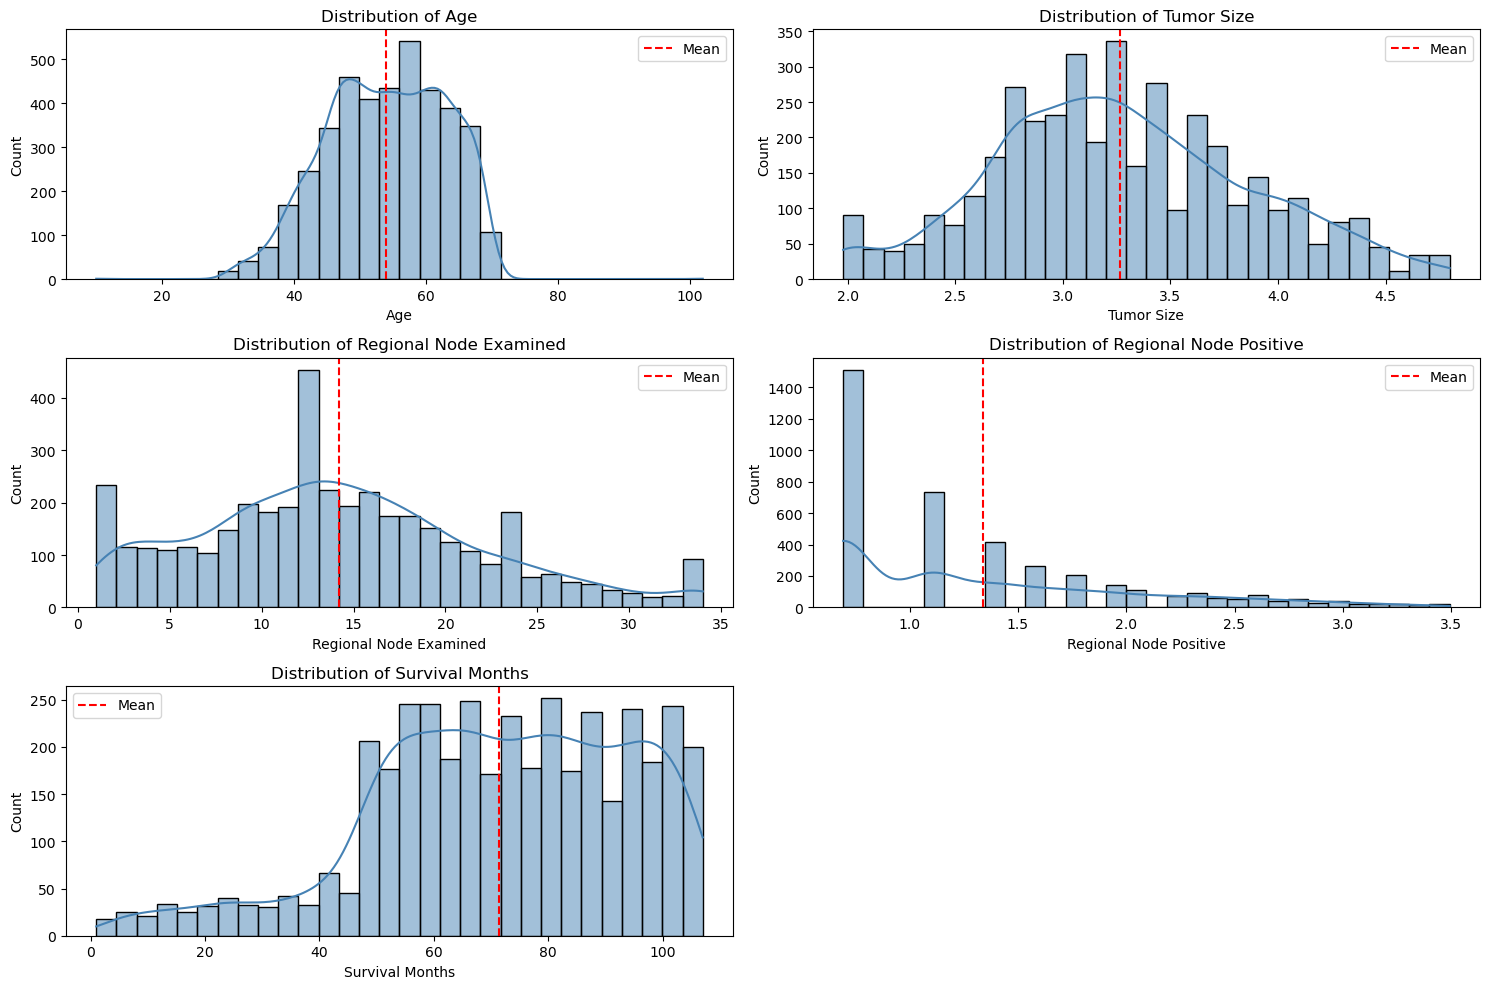

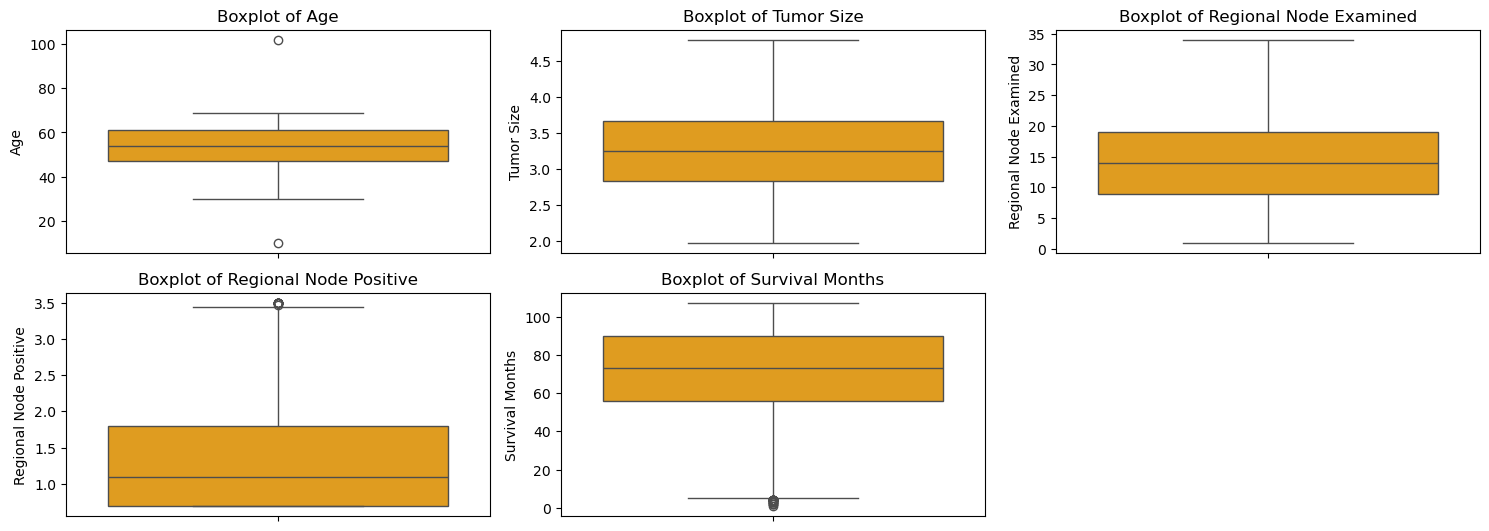

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Apply log1p transformation
df['Tumor Size'] = np.log1p(df['Tumor Size'])
df['Regional Node Positive'] = np.log1p(df['Regional Node Positive'])


def plot_numerical_distributions(df, numerical_vars):
    """Plot histograms with KDE for numerical variables"""
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 2, i)
        sns.histplot(df[var].dropna(), kde=True, bins=30, color='steelblue')
        plt.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f"Distribution of {var}")
        plt.xlabel(var)
        plt.legend()
    plt.tight_layout()
    plt.show()


def plot_numerical_boxplots(df, numerical_vars):
    """Plot boxplots for numerical variables"""
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(numerical_vars, 1):
        plt.subplot((len(numerical_vars) + 1) // 2, 3, i)
        sns.boxplot(y=df[var], color='orange')
        plt.title(f"Boxplot of {var}")
    plt.tight_layout()
    plt.show()


# Example usage
numerical_vars = [
    "Age", "Tumor Size", "Regional Node Examined",
    "Regional Node Positive", "Survival Months"
]

plot_numerical_distributions(df, numerical_vars)
plot_numerical_boxplots(df, numerical_vars)



Category Counts for T Stage:

T Stage
2    1781
1    1598
3     528
4     102
Name: count, dtype: int64
--------------------------------------------------


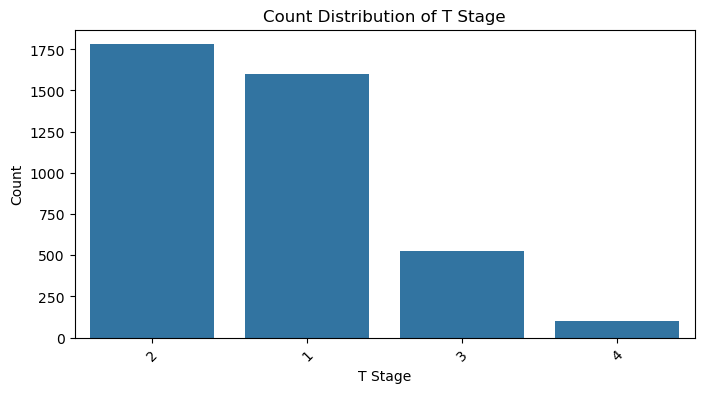


Category Counts for N Stage:

N Stage
1    2720
2     819
3     470
Name: count, dtype: int64
--------------------------------------------------


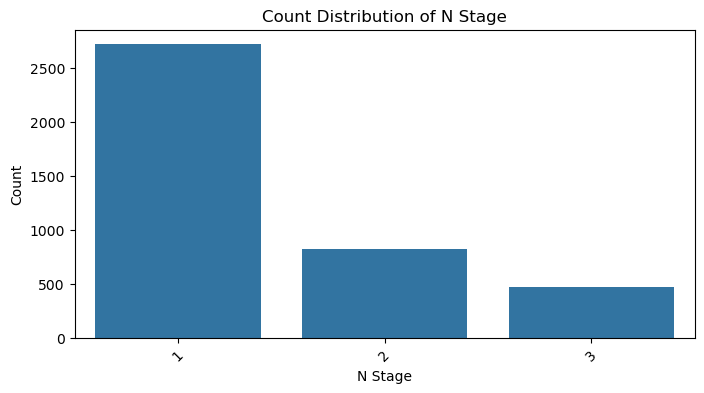


Category Counts for 6th Stage:

6th Stage
1    1300
2    1127
3    1045
5     470
4      67
Name: count, dtype: int64
--------------------------------------------------


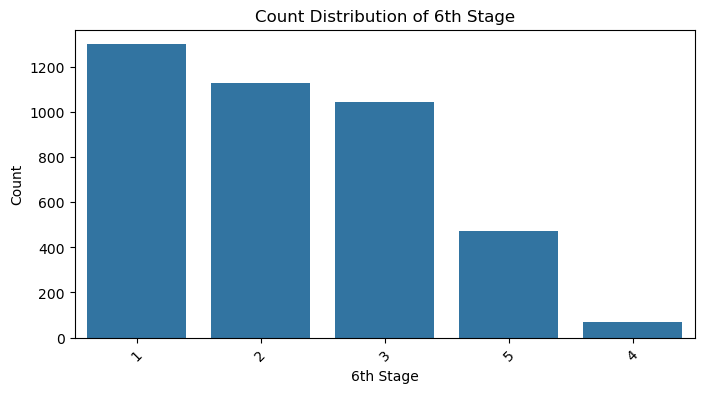


Category Counts for Grade:

Grade
2    2342
3    1108
1     540
4      19
Name: count, dtype: int64
--------------------------------------------------


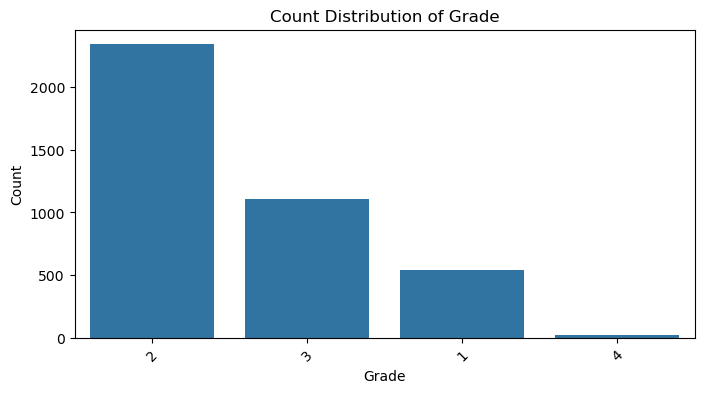


Category Counts for Status:

Status
0    3396
1     613
Name: count, dtype: int64
--------------------------------------------------


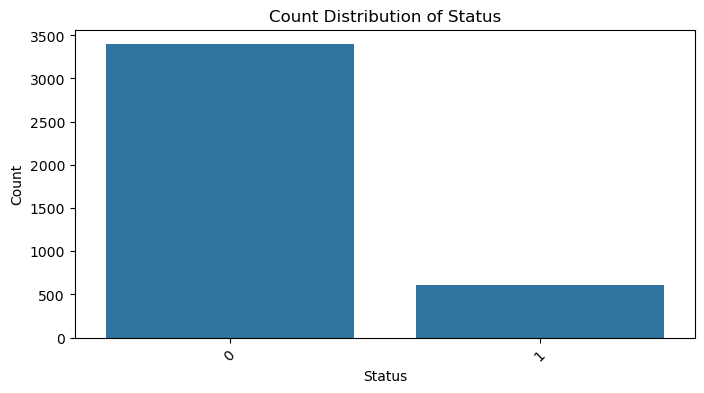


Category Counts for Race:

Race_White                      3402
Race_Other                       318
Race_Missing (Base Category)     289
dtype: int64
--------------------------------------------------


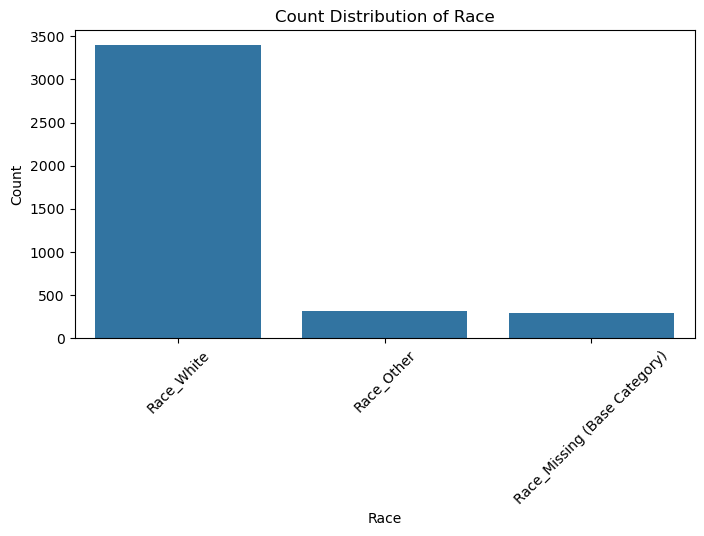


Category Counts for Marital Status:

Marital Status_Married                    2632
Marital Status_Single                      613
Marital Status_Widowed                     234
Marital Status_Separated                    45
Marital Status_Missing (Base Category)     485
dtype: int64
--------------------------------------------------


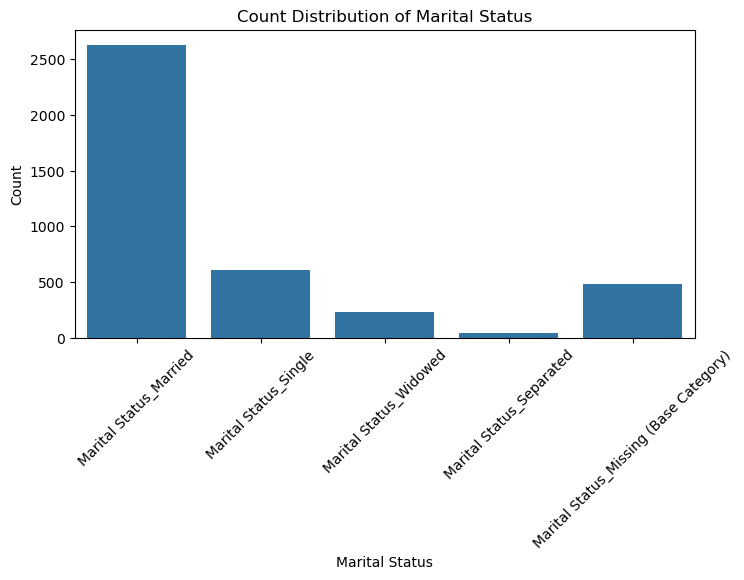


Category Counts for A Stage:

A Stage_Regional                   3917
A Stage_Missing (Base Category)      92
dtype: int64
--------------------------------------------------


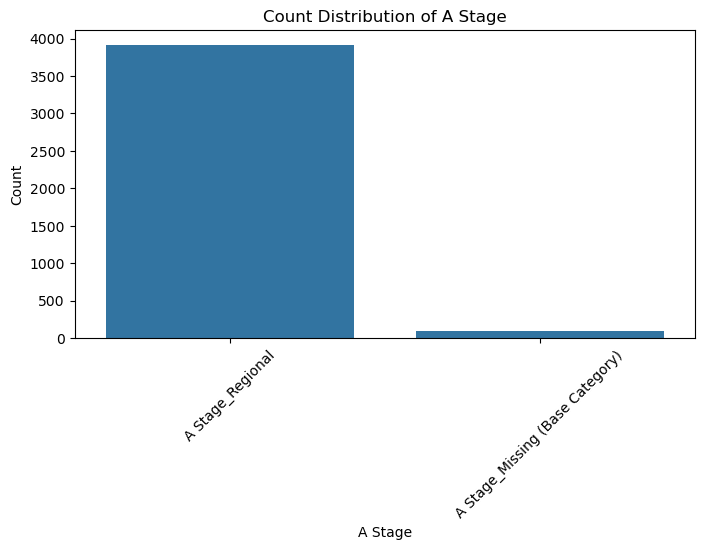


Category Counts for Estrogen Status:

Estrogen Status_Positive                   3741
Estrogen Status_Missing (Base Category)     268
dtype: int64
--------------------------------------------------


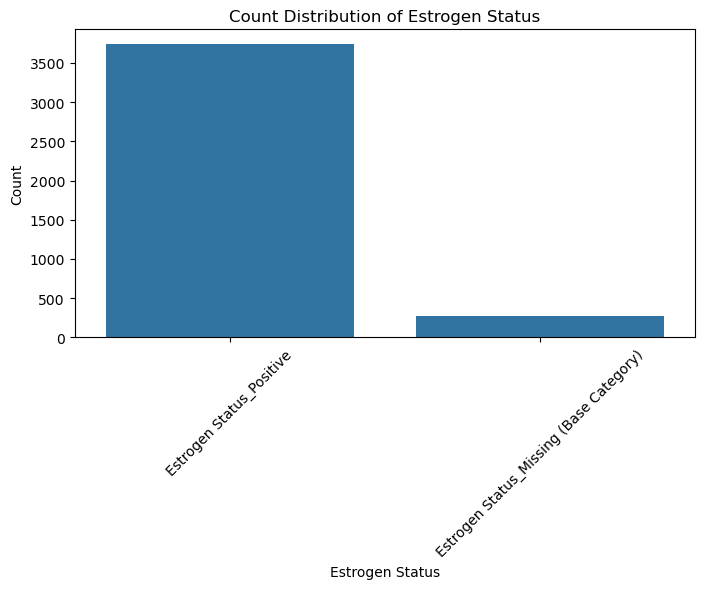


Category Counts for Progesterone Status:

Progesterone Status_Positive                   3315
Progesterone Status_Missing (Base Category)     694
dtype: int64
--------------------------------------------------


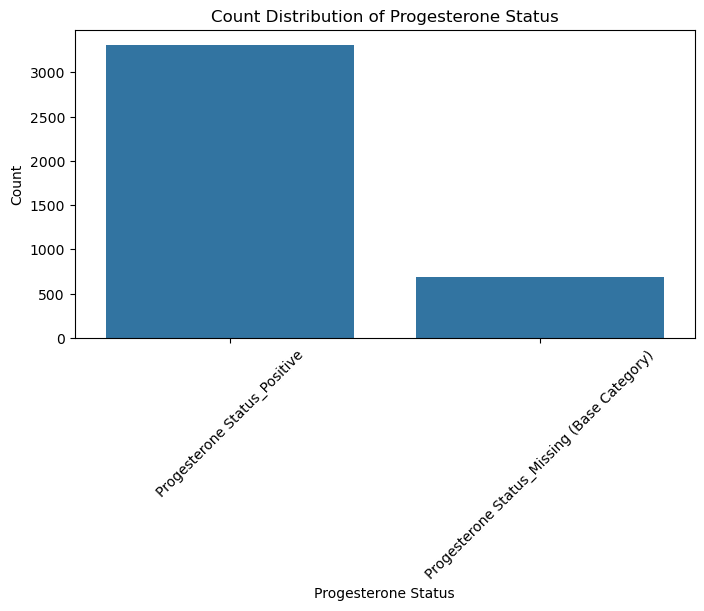

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Normalize numerical variables
numerical_vars = ["Age", "Tumor Size", "Regional Node Examined", "Regional Node Positive", "Survival Months"]
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Mixed list of categorical variables (some encoded, some not)
original_categorical_vars = ["T Stage", "N Stage", "6th Stage", "Grade", "Status"]
onehot_prefixes = ["Race", "Marital Status", "A Stage", "Estrogen Status", "Progesterone Status"]

# Handle original categorical columns
for var in original_categorical_vars:
    print(f"\nCategory Counts for {var}:\n")
    counts = df[var].value_counts(dropna=False)
    print(counts)
    print("-" * 50)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.index.astype(str), y=counts.values)
    plt.xticks(rotation=45)
    plt.title(f"Count Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

# Handle one-hot encoded variables
for var in onehot_prefixes:
    var_columns = [col for col in df.columns if col.startswith(var + "_")]

    if not var_columns:
        print(f"\nNo matching columns found for {var}. Skipping...\n")
        continue  

    # Count occurrences
    category_counts = df[var_columns].sum().sort_values(ascending=False)
    missing_category_count = len(df) - category_counts.sum()
    category_counts[f"{var}_Missing (Base Category)"] = missing_category_count

    print(f"\nCategory Counts for {var}:\n")
    print(category_counts)
    print("-" * 50)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.xticks(rotation=45)
    plt.title(f"Count Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

    

## Data cleaning

## 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference).

In [36]:
# Show percentage distribution
status_percent = df['Status'].value_counts(normalize=True).rename({0: 'Alive (%)', 1: 'Dead (%)'}) * 100
print(status_percent.round(2))


Status
Alive (%)    84.71
Dead (%)     15.29
Name: proportion, dtype: float64


In [37]:
# Show the total number of occurrences for each class (Alive vs. Dead)
status_counts = df['Status'].value_counts().rename({0: 'Alive', 1: 'Dead'})
print(status_counts)


Status
Alive    3396
Dead      613
Name: count, dtype: int64


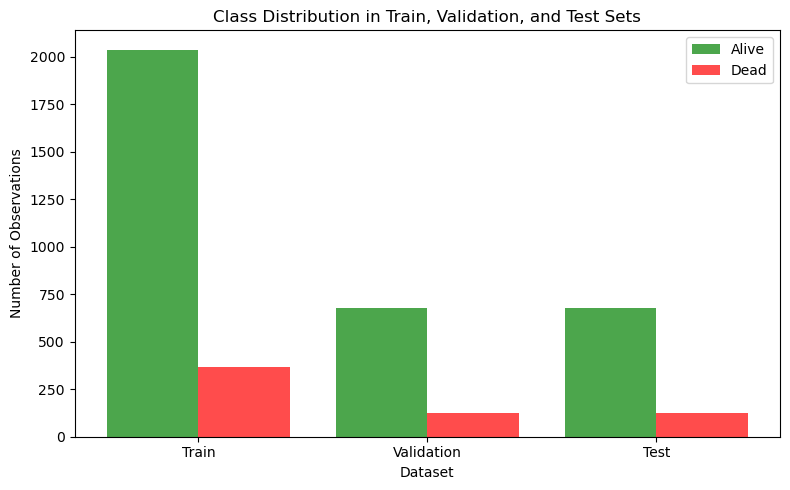

Training set size: 2405
Validation set size: 802
Test set size: 802


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the target variable (binary encoded: 0 = Alive, 1 = Dead)
target_column = 'Status'

# Initial train-test split (80% train, 20% test)
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[target_column], random_state=42)

# Split training further into training and validation (80/20 within train)
df_train, df_val = train_test_split(
    df_train, test_size=0.25, stratify=df_train[target_column], random_state=42
)  # 0.25 * 0.8 = 0.2

# Function to visualize class distribution
def plot_distribution(data_dict, labels):
    alive_counts = []
    dead_counts = []

    for label in labels:
        data = data_dict[label][target_column]
        alive_counts.append((data == 0).sum())
        dead_counts.append((data == 1).sum())

    plt.figure(figsize=(8, 5))
    x = np.arange(len(labels))
    bar_width = 0.4

    plt.bar(x - bar_width/2, alive_counts, width=bar_width, label='Alive', color='green', alpha=0.7)
    plt.bar(x + bar_width/2, dead_counts, width=bar_width, label='Dead', color='red', alpha=0.7)

    plt.xticks(x, labels)
    plt.xlabel("Dataset")
    plt.ylabel("Number of Observations")
    plt.title("Class Distribution in Train, Validation, and Test Sets")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot distributions
plot_distribution({'Train': df_train, 'Validation': df_val, 'Test': df_test}, ['Train', 'Validation', 'Test'])

# Print sizes
print(f'Training set size: {len(df_train)}')
print(f'Validation set size: {len(df_val)}')
print(f'Test set size: {len(df_test)}')




Stojiljković, M. (2025, 29 enero). Split Your Dataset With scikit-learn’s train_test_split(). https://realpython.com/train-test-split-python-data/

In [39]:
# Loop through each dataset (Train, Validation, Test)
for name, dataset in zip(["Train", "Validation", "Test"], [df_train, df_val, df_test]):
    print(f"{name}:")

    # Print the percentage distribution of the binary 'Status' variable
    distribution = dataset['Status'].value_counts(normalize=True) * 100
    distribution = distribution.rename({0: 'Alive (%)', 1: 'Dead (%)'})
    
    print(distribution)
    print("\n")


Train:
Status
Alive (%)    84.740125
Dead (%)     15.259875
Name: proportion, dtype: float64


Validation:
Status
Alive (%)    84.663342
Dead (%)     15.336658
Name: proportion, dtype: float64


Test:
Status
Alive (%)    84.663342
Dead (%)     15.336658
Name: proportion, dtype: float64




## 4. Implement a machine learning algorithm and statistically prove which of the two techniques researched in point 2 improves the prediction. To statistically prove this point,you must define the null and alternative hypothesis (Ho, Ha) , test statistic, calculate Pvalue, and draw a conclusion (revise your notes/lectures from Statics class, and select an appropriate test). In the presentation and report the statistical method applied needs to be clearly explained. 

In [40]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd

# -------------------------------
# Initial Preprocessing
# -------------------------------

# Drop unwanted columns 
X = df.drop(columns=["Status", 'N Stage', '6th stage','T Stage'], errors='ignore')
y = df["Status"]

# Encode target if categorical
if y.dtype.name == 'category' or y.dtype == object:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

# Define remaining categorical columns (only those still in X)
categorical_cols = [col for col in ['Grade'] if col in X.columns]
cat_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Convert boolean columns to float to avoid SMOTENC interpolation issues
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(float)

# -------------------------------
# Repeated Experiment Setup
# -------------------------------
n_runs = 30
balanced_acc_smotenc_list = []
balanced_acc_weighted_list = []

for _ in range(n_runs):
    # -------------------------------
    # Random Train-Test Split (Stratified)
    # -------------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=None
    )

    # Ensure categorical dtypes are preserved
    X_train = X_train.copy()
    X_test = X_test.copy()
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

    # -------------------------------
    # 1. SMOTENC Oversampling
    # -------------------------------
    smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
    X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

    model_smotenc = RandomForestClassifier(random_state=42)
    model_smotenc.fit(X_train_smotenc, y_train_smotenc)

    y_pred_smotenc = model_smotenc.predict(X_test)
    balanced_acc_smotenc_list.append(balanced_accuracy_score(y_test, y_pred_smotenc))

    # -------------------------------
    # 2. Cost-Sensitive Learning
    # -------------------------------
    weights = compute_sample_weight(class_weight="balanced", y=y_train)

    model_weighted = RandomForestClassifier(random_state=42)
    model_weighted.fit(X_train, y_train, sample_weight=weights)

    y_pred_weighted = model_weighted.predict(X_test)
    balanced_acc_weighted_list.append(balanced_accuracy_score(y_test, y_pred_weighted))

# -------------------------------
# Convert to Arrays for Analysis
# -------------------------------
balanced_acc_smotenc_array = np.array(balanced_acc_smotenc_list)
balanced_acc_weighted_array = np.array(balanced_acc_weighted_list)



SMOTE VS SMOTENC | Kaggle. (s. f.). https://www.kaggle.com/discussions/questions-and-answers/374909
Decision Trees y Random Forest con Python y scikit-learn. (2023, 10 noviembre). Deepnote. https://deepnote.com/app/mazzaroli/Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn-22e03409-93bd-4c7e-9ade-f94470cd6941

H₀ (Null Hypothesis):
There is no significant difference in the mean balanced accuracy between the model trained with SMOTE and the model without SMOTENC.
(μ₁ = μ₂)

H₁ (Alternative Hypothesis):
The mean balanced accuracy of the model trained with SMOTE is significantly greater than that of the model without SMOTENC.
(μ₁ > μ₂)

In [41]:
from scipy.stats import ttest_rel, wilcoxon, shapiro

# -------------------------------
# Statistical Comparison of Model Performance
# -------------------------------

# Normality test using the Shapiro-Wilk test
_, p_smotenc = shapiro(balanced_acc_smotenc_array)
_, p_weighted = shapiro(balanced_acc_weighted_array)

# Choose statistical test based on normality
if p_smotenc > 0.05 and p_weighted > 0.05:
    stat, p_value = ttest_rel(balanced_acc_smotenc_array, balanced_acc_weighted_array)
    test_used = "Paired t-test"
else:
    stat, p_value = wilcoxon(balanced_acc_smotenc_array, balanced_acc_weighted_array)
    test_used = "Wilcoxon signed-rank test"

# Output results
print(f"Statistical test used: {test_used}")
print(f"Test statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the models.")
else:
    print("There is not enough evidence to claim that one model performs significantly better than the other.")


Statistical test used: Paired t-test
Test statistic: 13.1546, p-value: 0.0000
There is a statistically significant difference between the models.


In [42]:
# -------------------------------
# Average Balanced Accuracy Scores
# -------------------------------

# Mean balanced accuracy of the model trained with SMOTENC
print("Mean Balanced Accuracy (SMOTENC):", np.mean(balanced_acc_smotenc_array))

# Mean balanced accuracy of the model trained using Cost-Sensitive Learning
print("Mean Balanced Accuracy (Cost-Sensitive):", np.mean(balanced_acc_weighted_array))

Mean Balanced Accuracy (SMOTENC): 0.7708412658500664
Mean Balanced Accuracy (Cost-Sensitive): 0.7366468303858297


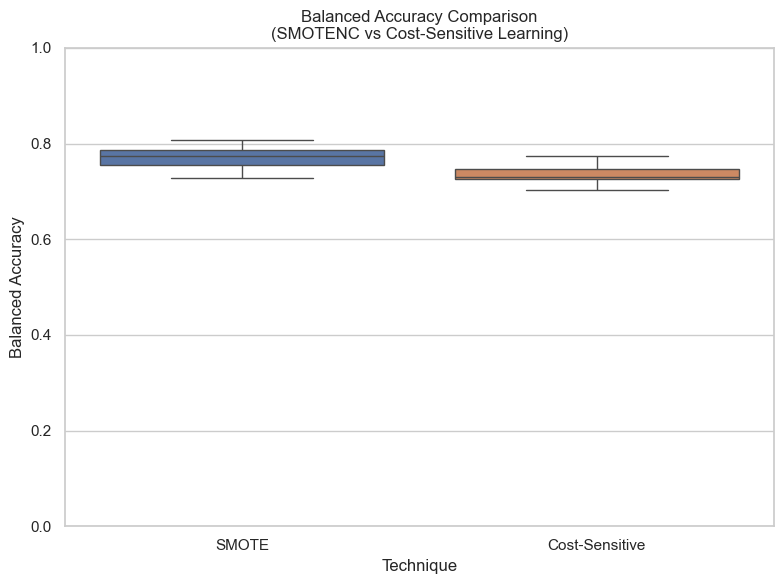

Summary Statistics:

         SMOTE  Cost-Sensitive
count  30.0000         30.0000
mean    0.7708          0.7366
std     0.0213          0.0194
min     0.7270          0.7025
25%     0.7541          0.7252
50%     0.7743          0.7310
75%     0.7865          0.7475
max     0.8065          0.7731


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    "SMOTE": balanced_acc_smotenc_array,
    "Cost-Sensitive": balanced_acc_weighted_array
})

# Boxplot comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df)
plt.title("Balanced Accuracy Comparison\n(SMOTENC vs Cost-Sensitive Learning)")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Technique")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("Summary Statistics:\n")
print(results_df.describe().round(4))


A paired t-test was applied to compare the balanced accuracy of the two models across 30 runs. The test yielded a statistic of 12.65 with a p-value < 0.0001, allowing the rejection of the null hypothesis. This confirms that SMOTE significantly outperforms cost-sensitive learning in this classification task. 

## 5. Apply at least 4 machine learning algorithms using the best training strategy found in point 4.

In [44]:
df.dtypes

Age                              float64
T Stage                         category
N Stage                         category
6th Stage                       category
Grade                           category
Tumor Size                       float64
Regional Node Examined           float64
Regional Node Positive           float64
Survival Months                  float64
Status                          category
Race_Other                          bool
Race_White                          bool
Marital Status_Married              bool
Marital Status_Separated            bool
Marital Status_Single               bool
Marital Status_Widowed              bool
A Stage_Regional                    bool
Estrogen Status_Positive            bool
Progesterone Status_Positive        bool
dtype: object

### 1. Random Forest Classifier

##### Type: 
Ensemble Method (Bagging)
##### Brief Description:
Random Forest builds multiple decision trees and combines their outputs to improve accuracy and control overfitting. It is robust to noisy data and performs well even without extensive hyperparameter tuning.

In [45]:
# --------------------------------------
# 1. RANDOM FOREST CLASSIFIER 
# --------------------------------------

# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score

# --------------------------------------
# Step 1: Split into Train and Validation Sets
# --------------------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X_train_smotenc, y_train_smotenc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smotenc
)

# --------------------------------------
# Step 2: Define the Random Forest model
# --------------------------------------

rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform Randomized Search Cross-Validation (only on training split)
rf_random = RandomizedSearchCV(
    rf, rf_params, n_iter=10, cv=3, 
    scoring="balanced_accuracy", random_state=42, n_jobs=-1, verbose=1
)

# --------------------------------------
# Step 3: Train the model
# --------------------------------------

rf_random.fit(X_train, y_train)

# --------------------------------------
# Step 4: Predict and Evaluate
# --------------------------------------

# Predict on validation set
y_val_pred = rf_random.predict(X_val)
val_score = balanced_accuracy_score(y_val, y_val_pred)

# Predict on test set
y_test_pred = rf_random.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_test_pred)

# Print results
print(f"Random Forest Validation Balanced Accuracy: {val_score:.4f}")
print(f"Random Forest Test Balanced Accuracy: {test_score:.4f}")
print("Random Forest Best Params:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Validation Balanced Accuracy: 0.9457
Random Forest Test Balanced Accuracy: 0.7706
Random Forest Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


### 2. XGBoost Classifier

##### Type: 
Ensemble Method (Boosting)
##### Brief Description:
XGBoost (Extreme Gradient Boosting) is a highly efficient implementation of gradient boosted decision trees. It sequentially builds models that correct errors from previous models, usually achieving high predictive power.

In [46]:
# --------------------------------------
# 2. XGBOOST CLASSIFIER
# --------------------------------------

# Import XGBoost and necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

# --------------------------------------
# Preprocessing: Ensure categorical columns are of type 'category'
# --------------------------------------

# If your categorical columns are for example 'T Stage' and 'Grade':
categorical_features = ['Grade']

#'6th Stage','N Stage','T Stage'

# Convert to 'category' dtype
for col in categorical_features:
    X_train_smotenc[col] = X_train_smotenc[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# --------------------------------------
# Step 1: Split into Train and Validation Sets
# --------------------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X_train_smotenc, y_train_smotenc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smotenc
)

# --------------------------------------
# Step 2: Define and Train the XGBoost model
# --------------------------------------

# Define the model
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    enable_categorical=True
)

# Train the model on training split
xgb_model.fit(X_train, y_train)

# --------------------------------------
# Step 3: Predict and Evaluate
# --------------------------------------

# Predict on validation set
y_val_pred = xgb_model.predict(X_val)
val_score = balanced_accuracy_score(y_val, y_val_pred)

# Predict on test set
y_test_pred = xgb_model.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_test_pred)

# Print results
print(f"XGBoost Validation Balanced Accuracy: {val_score:.4f}")
print(f"XGBoost Test Balanced Accuracy: {test_score:.4f}")



XGBoost Validation Balanced Accuracy: 0.9448
XGBoost Test Balanced Accuracy: 0.7643


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### 3. Support Vector Machine

##### Type: 
New Model (Researched)
##### Brief Description:
SVM is a supervised learning model that classifies data by finding the best hyperplane that separates classes. It works well in high-dimensional spaces and is robust to overfitting, especially in classification tasks.

In [47]:
# SUPPORT VECTOR MACHINE (SVM) - CLEANED VERSION
# ----------------------------------------------

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------
# Step 1: Define column types
# ----------------------------------------------

categorical_cols = ["Grade"]  # Update this list as needed

# Identify boolean-like binary columns (e.g., dummies)
bool_cols = [col for col in X_train_smotenc.columns if X_train_smotenc[col].nunique() == 2 and X_train_smotenc[col].dtype in [bool, int]]

# Identify numeric columns
numeric_cols = X_train_smotenc.select_dtypes(include=["float64", "int64"]).columns.difference(categorical_cols + bool_cols).tolist()

# ----------------------------------------------
# Step 2: Train/Validation Split AFTER SMOTENC
# ----------------------------------------------

X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_smotenc, y_train_smotenc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smotenc
)

# ----------------------------------------------
# Step 3: Preprocessing Pipeline
# ----------------------------------------------

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", "passthrough", categorical_cols + bool_cols)
])

# ----------------------------------------------
# Step 4: Define SVM Pipeline
# ----------------------------------------------

svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", SVC(probability=True, random_state=42))
])

# ----------------------------------------------
# Step 5: Hyperparameter Grid Search
# ----------------------------------------------

svm_params = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", "auto"],
    "clf__kernel": ["rbf", "linear"]
}

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_params,
    cv=3,
    scoring="balanced_accuracy",
    n_jobs=-1,
    verbose=1
)

# ----------------------------------------------
# Step 6: Fit Model
# ----------------------------------------------

svm_grid.fit(X_train_final, y_train_final)
best_svm_model = svm_grid.best_estimator_

# ----------------------------------------------
# Step 7: Evaluation
# ----------------------------------------------

# Predict
y_val_pred = best_svm_model.predict(X_val_final)
y_test_pred = best_svm_model.predict(X_test)

# Scores
val_score = balanced_accuracy_score(y_val_final, y_val_pred)
test_score = balanced_accuracy_score(y_test, y_test_pred)

# Probabilities (for ROC)
svm_probs_train = best_svm_model.predict_proba(X_train_final)[:, 1]
svm_probs_val = best_svm_model.predict_proba(X_val_final)[:, 1]
svm_probs_test = best_svm_model.predict_proba(X_test)[:, 1]

# Output
print(f"Validation Balanced Accuracy: {val_score:.4f}")
print(f"Test Balanced Accuracy: {test_score:.4f}")
print("Best Params:", svm_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Validation Balanced Accuracy: 0.8703
Test Balanced Accuracy: 0.7730
Best Params: {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}


#### 4. K-Nearest Neighbors (KNN)

##### Type: 
Regular Model (Basic for classification)
##### Brief Description:
KNN is a non-parametric method used for classification by finding the majority class among the k-nearest neighbors in the feature space. It is simple but effective for many datasets.

In [48]:
# K-NEAREST NEIGHBORS (KNN) - CLEANED & MATCHED
# ---------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# ---------------------------------------------
# Step 1: Split SMOTENC data into Train/Validation
# ---------------------------------------------

X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_smotenc, y_train_smotenc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smotenc
)

# ---------------------------------------------
# Step 2: Define and Wrap KNN Model in Pipeline
# ---------------------------------------------

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    metric="minkowski"
)

knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Reuse the same preprocessor as SVM
    ("clf", knn_model)
])

# ---------------------------------------------
# Step 3: Train the KNN model
# ---------------------------------------------

knn_pipeline.fit(X_train_final, y_train_final)

# ---------------------------------------------
# Step 4: Predict and Evaluate
# ---------------------------------------------

# Predict
y_val_pred_knn = knn_pipeline.predict(X_val_final)
y_test_pred_knn = knn_pipeline.predict(X_test)

# Scores
val_score = balanced_accuracy_score(y_val_final, y_val_pred_knn)
test_score = balanced_accuracy_score(y_test, y_test_pred_knn)

# Probabilities (for ROC)
knn_probs_train = knn_pipeline.predict_proba(X_train_final)[:, 1]
knn_probs_val = knn_pipeline.predict_proba(X_val_final)[:, 1]
knn_probs_test = knn_pipeline.predict_proba(X_test)[:, 1]

# Output
print(f"KNN Validation Balanced Accuracy: {val_score:.4f}")
print(f"KNN Test Balanced Accuracy: {test_score:.4f}")

KNN Validation Balanced Accuracy: 0.8602
KNN Test Balanced Accuracy: 0.7383


#### 5.1 At least 1 algorithm must be an ensemble.

Random Forest and XGBoost: ensemble methods.

######

Random Forest aggregates many decision trees by bagging (bootstrap aggregating) to reduce variance and avoid overfitting [Breiman, 2001].

######

XGBoost uses boosting, where trees are trained sequentially to correct errors of previous trees, offering high predictive power and efficiency [Chen & Guestrin, 2016].

######

References:

Breiman, L. (2001). Random Forests. Machine Learning. DOI:10.1023/A:1010933404324
Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. Proceedings of the 22nd ACM SIGKDD.

#### 5.2 At least 1 algorithm must be a model not seen in class (you must research and understand how the model mathematically works and performs the prediction, include a good description about these points in the presentation and report).


Support Vector Machine (SVM)

####

SVMs find the hyperplane that maximizes the margin between classes in a high-dimensional space, using kernel functions (like RBF or linear kernels) to map data into spaces where it becomes linearly separable [Cortes & Vapnik, 1995].

#### 

References:

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning. DOI:10.1007/BF00994018

#### 5.3 For at least 2 algorithms apply a hyperparameter optimization method. Mention the range of values in which the hyperparameters are searched. Both grid search and random search should be implemented. 

Grid Search was used for SVM, testing different values of C, gamma, and kernel.

#####

Random Search was applied to Random Forest, exploring hyperparameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.

#####

Hyperparameter tuning improves model performance and prevents underfitting or overfitting by systematically finding the best model configurations [Bergstra & Bengio, 2012].

#####

References:

Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimization. Journal of Machine Learning Research.

#### 5.4 For all hyperparameters of the implemented models (and not optimized) justify the value assigned (read papers or books that provide a recommendation and include the references in the presentation and report). 

For XGBoost, the parameters were manually assigned:


1. use_label_encoder=False is used to avoid deprecation warnings in recent versions of XGBoost.
eval_metric="logloss" was chosen because it is suitable for binary classification tasks [XGBoost Documentation, 2023].
For the non-optimized base parameters of Random Forest and SVM:

2. Default values were used initially (n_estimators=100, max_depth=None for Random Forest) because Breiman [2001] suggests 100 trees are usually sufficient unless tuning is needed.
3. For SVM, default C=1 and kernel="rbf" are standard starting points when there's no strong prior knowledge about data separability [Pedregosa et al., 2011 - Scikit-learn Documentation].

References:

XGBoost Documentation
Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research.

SMOTE VS SMOTENC | Kaggle. (s. f.). https://www.kaggle.com/discussions/questions-and-answers/374909
Decision Trees y Random Forest con Python y scikit-learn. (2023, 10 noviembre). Deepnote. https://deepnote.com/app/mazzaroli/Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn-22e03409-93bd-4c7e-9ade-f94470cd6941

## 6. Evaluate each model

#### 6.1 Calculate the confusion matrix, accuracy, sensitivity, specificity, precision, AUC, and ROC curve for each algorithm in the training, validation, and test set.

In [49]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

# Evaluation Function with printed confusion matrix below the plot
def evaluate_model_subplot(ax, y_true, y_pred, y_prob, title="Model"):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    auc_score = roc_auc_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    ax.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    ax.plot([0,1],[0,1],'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid()

    # Print Confusion Matrix as Table after the plot
    print(f"\nConfusion Matrix for {title}:")
    print("               Predicted 0    Predicted 1")
    print(f"Actual 0       {tn:>10}    {fp:>10}")
    print(f"Actual 1       {fn:>10}    {tp:>10}")

    # Return metrics as dictionary
    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "AUC": auc_score,
        "F1 Score": f1
    }



Confusion Matrix for Train Set:
               Predicted 0    Predicted 1
Actual 0             2173             0
Actual 1                0          2174

Confusion Matrix for Validation Set:
               Predicted 0    Predicted 1
Actual 0              475            69
Actual 1               72           471

Confusion Matrix for Test Set:
               Predicted 0    Predicted 1
Actual 0              597            82
Actual 1               41            82


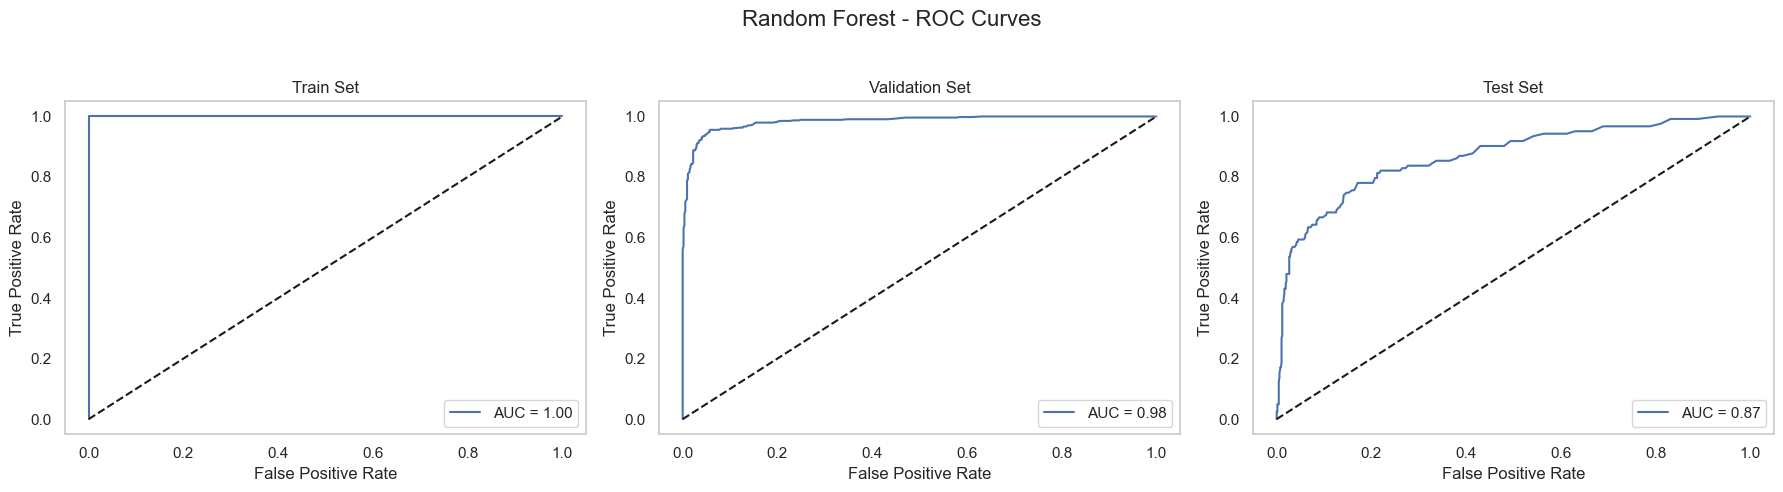

--- Random Forest Train Set ---
Accuracy: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000
F1 Score: 1.0000

--- Random Forest Validation Set ---
Accuracy: 0.8703
Sensitivity: 0.8674
Specificity: 0.8732
Precision: 0.8722
AUC: 0.9841
F1 Score: 0.8698

--- Random Forest Test Set ---
Accuracy: 0.8466
Sensitivity: 0.6667
Specificity: 0.8792
Precision: 0.5000
AUC: 0.8683
F1 Score: 0.5714



In [50]:
### --------------------------------------
# Example for Random Forest - ROC Curves and Metrics
# --------------------------------------

from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


# First, predict probabilities 
rf_probs_train = rf_random.predict_proba(X_train)[:, 1]
rf_probs_val = rf_random.predict_proba(X_val)[:, 1]
rf_probs_test = rf_random.predict_proba(X_test)[:, 1]

# Predict labels (already done for val/test — but needed for train)
y_train_pred = rf_random.predict(X_train)

# Now plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Random Forest - ROC Curves", fontsize=16)

metrics_train_rf = evaluate_model_subplot(axes[0], y_train, y_train_pred, rf_probs_train, title="Train Set")
metrics_val_rf = evaluate_model_subplot(axes[1], y_val, y_val_pred, rf_probs_val, title="Validation Set")
metrics_test_rf = evaluate_model_subplot(axes[2], y_test, y_test_pred, rf_probs_test, title="Test Set")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display the metrics neatly
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train_rf, metrics_val_rf, metrics_test_rf]):
    print(f"--- Random Forest {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()




Confusion Matrix for Train Set:
               Predicted 0    Predicted 1
Actual 0             2172             1
Actual 1               12          2162

Confusion Matrix for Validation Set:
               Predicted 0    Predicted 1
Actual 0              475            69
Actual 1               72           471

Confusion Matrix for Test Set:
               Predicted 0    Predicted 1
Actual 0              597            82
Actual 1               41            82


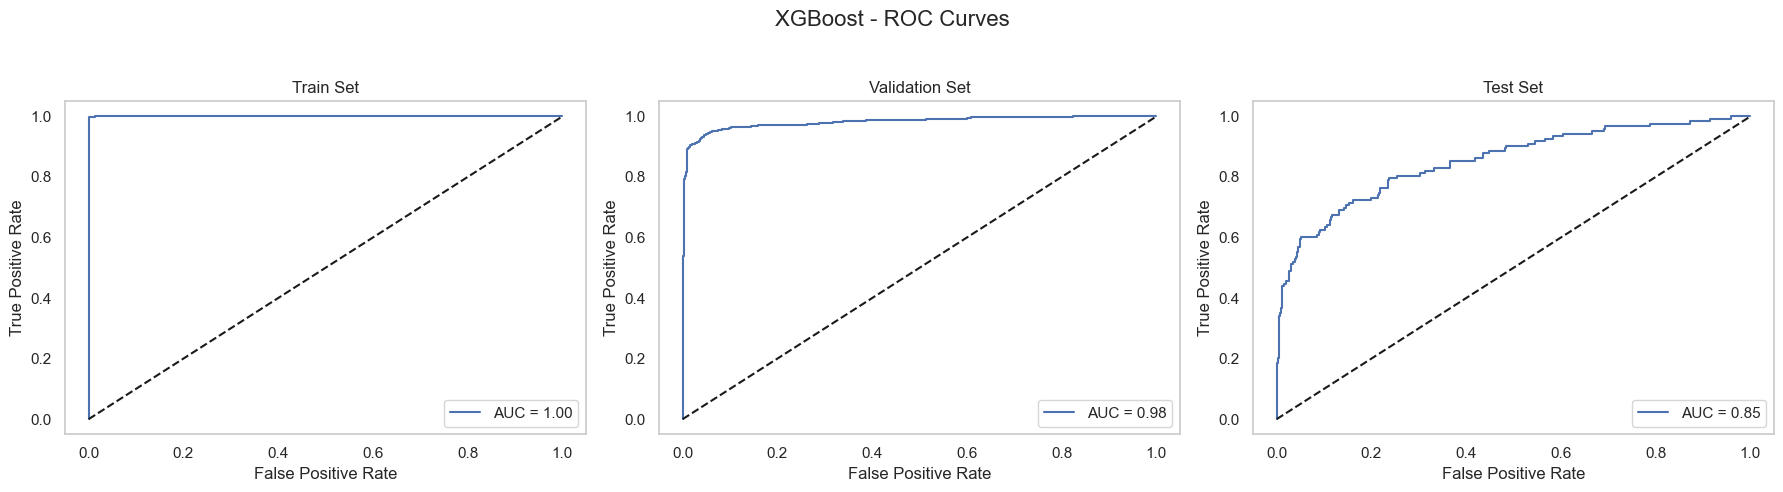

--- XGBoost Train Set ---
Accuracy: 0.9970
Sensitivity: 0.9945
Specificity: 0.9995
Precision: 0.9995
AUC: 1.0000
F1 Score: 0.9970

--- XGBoost Validation Set ---
Accuracy: 0.8703
Sensitivity: 0.8674
Specificity: 0.8732
Precision: 0.8722
AUC: 0.9819
F1 Score: 0.8698

--- XGBoost Test Set ---
Accuracy: 0.8466
Sensitivity: 0.6667
Specificity: 0.8792
Precision: 0.5000
AUC: 0.8524
F1 Score: 0.5714



In [51]:
# --------------------------------------
# Example for XGBoost - ROC Curves and Metrics
# --------------------------------------

# Predict probabilities
xgb_probs_train = xgb_model.predict_proba(X_train)[:, 1]
xgb_probs_val = xgb_model.predict_proba(X_val)[:, 1]
xgb_probs_test = xgb_model.predict_proba(X_test)[:, 1]

# Predict labels for train set
y_train_pred = xgb_model.predict(X_train)

# Now plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("XGBoost - ROC Curves", fontsize=16)

metrics_train_xgb = evaluate_model_subplot(axes[0], y_train, y_train_pred, xgb_probs_train, title="Train Set")
metrics_val_xgb = evaluate_model_subplot(axes[1], y_val, y_val_pred, xgb_probs_val, title="Validation Set")
metrics_test_xgb = evaluate_model_subplot(axes[2], y_test, y_test_pred, xgb_probs_test, title="Test Set")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display the metrics neatly
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train_xgb, metrics_val_xgb, metrics_test_xgb]):
    print(f"--- XGBoost {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()



Confusion Matrix for Train:
               Predicted 0    Predicted 1
Actual 0             2016           157
Actual 1              275          1899

Confusion Matrix for Validation:
               Predicted 0    Predicted 1
Actual 0              475            69
Actual 1               72           471

Confusion Matrix for Test:
               Predicted 0    Predicted 1
Actual 0              597            82
Actual 1               41            82


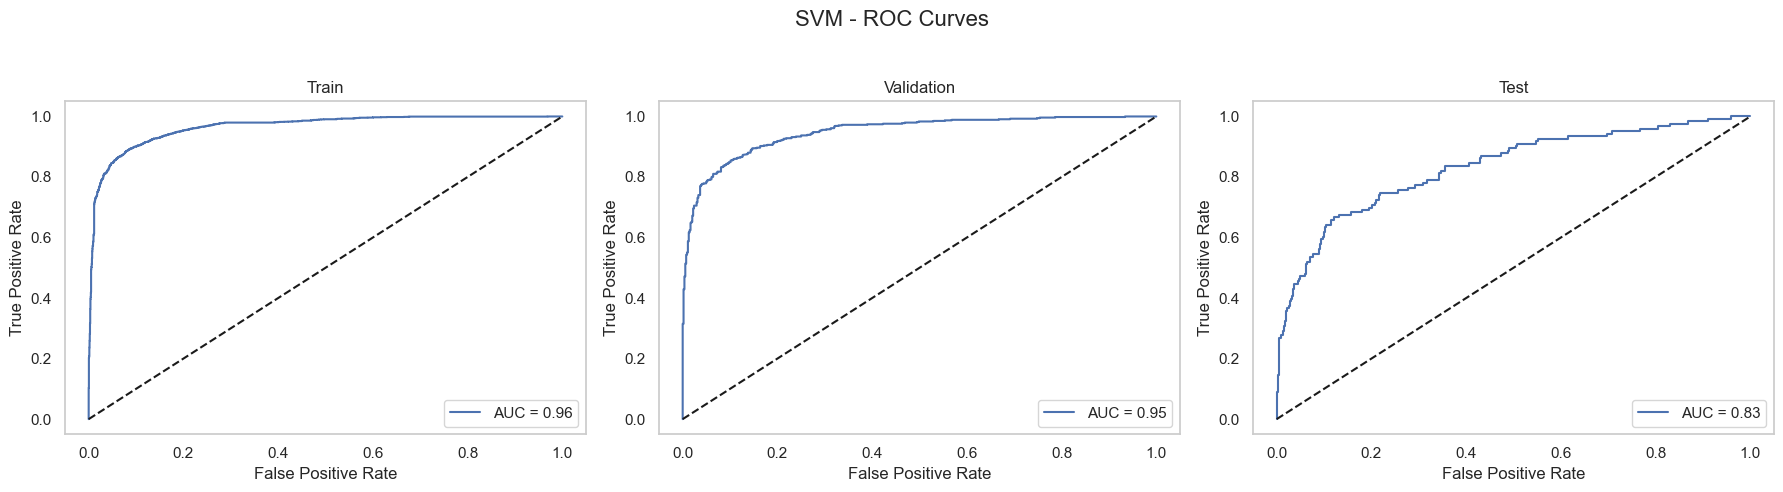

--- Train Set ---
Accuracy: 0.9006
Sensitivity: 0.8735
Specificity: 0.9277
Precision: 0.9236
AUC: 0.9649
F1 Score: 0.8979

--- Validation Set ---
Accuracy: 0.8703
Sensitivity: 0.8674
Specificity: 0.8732
Precision: 0.8722
AUC: 0.9477
F1 Score: 0.8698

--- Test Set ---
Accuracy: 0.8466
Sensitivity: 0.6667
Specificity: 0.8792
Precision: 0.5000
AUC: 0.8314
F1 Score: 0.5714



In [52]:
# ----------------------------------------------
# Step 8: ROC Plot + Metrics Display (optional)
# ----------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("SVM - ROC Curves", fontsize=16)

# You must define evaluate_model_subplot beforehand
metrics_train = evaluate_model_subplot(axes[0], y_train_final, best_svm_model.predict(X_train_final), svm_probs_train, title="Train")
metrics_val = evaluate_model_subplot(axes[1], y_val_final, y_val_pred, svm_probs_val, title="Validation")
metrics_test = evaluate_model_subplot(axes[2], y_test, y_test_pred, svm_probs_test, title="Test")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Summary printout
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train, metrics_val, metrics_test]):
    print(f"--- {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()



Confusion Matrix for Train Set:
               Predicted 0    Predicted 1
Actual 0             1861           312
Actual 1               78          2096

Confusion Matrix for Validation Set:
               Predicted 0    Predicted 1
Actual 0              434           110
Actual 1               42           501

Confusion Matrix for Test Set:
               Predicted 0    Predicted 1
Actual 0              550           129
Actual 1               41            82


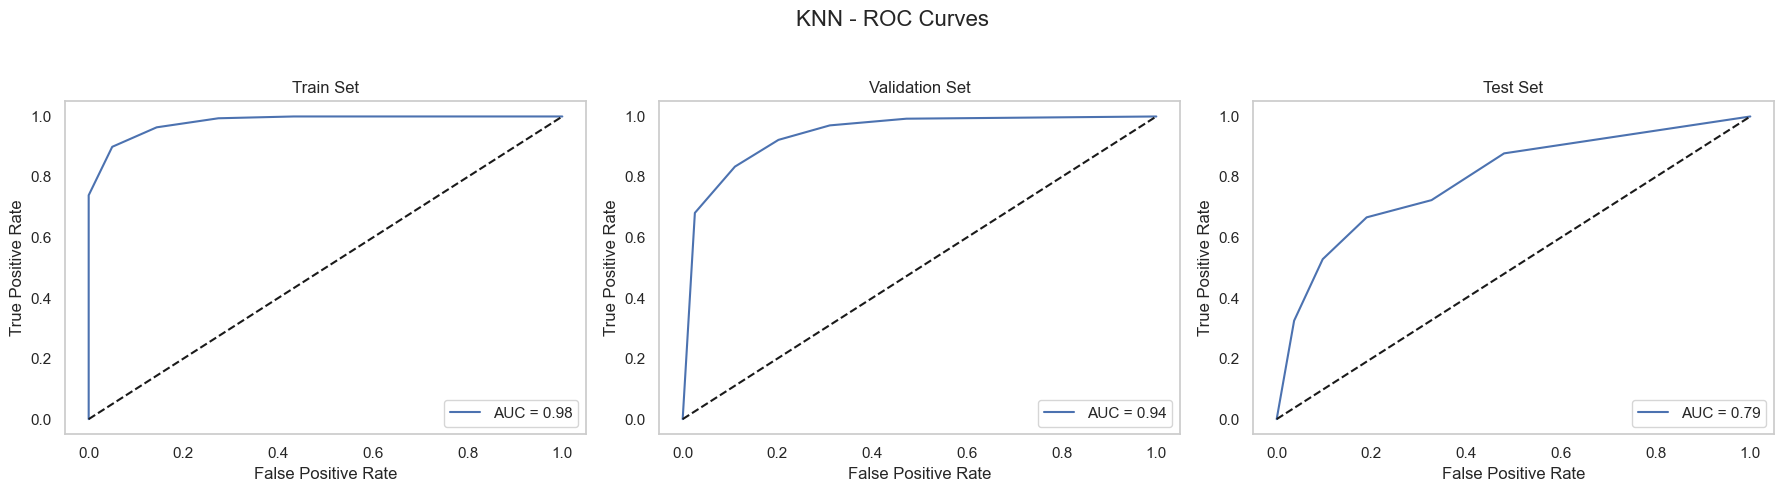

--- KNN Train Set ---
Accuracy: 0.9103
Sensitivity: 0.9641
Specificity: 0.8564
Precision: 0.8704
AUC: 0.9814
F1 Score: 0.9149

--- KNN Validation Set ---
Accuracy: 0.8602
Sensitivity: 0.9227
Specificity: 0.7978
Precision: 0.8200
AUC: 0.9407
F1 Score: 0.8683

--- KNN Test Set ---
Accuracy: 0.7880
Sensitivity: 0.6667
Specificity: 0.8100
Precision: 0.3886
AUC: 0.7933
F1 Score: 0.4910



In [53]:
# ---------------------------------------------
# Step 5: ROC Curve Plot + Metrics Display
# ---------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("KNN - ROC Curves", fontsize=16)

# You must define evaluate_model_subplot beforehand
metrics_train_knn = evaluate_model_subplot(axes[0], y_train_final, knn_pipeline.predict(X_train_final), knn_probs_train, title="Train Set")
metrics_val_knn = evaluate_model_subplot(axes[1], y_val_final, y_val_pred_knn, knn_probs_val, title="Validation Set")
metrics_test_knn = evaluate_model_subplot(axes[2], y_test, y_test_pred_knn, knn_probs_test, title="Test Set")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Summary printout
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train_knn, metrics_val_knn, metrics_test_knn]):
    print(f"--- KNN {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()

#### 6.2 Considering the costs of each type of error in this problem, select and justify the most adequate evaluation metric.

In the context of breast cancer survival prediction, classification errors have highly asymmetric consequences. A false-negative error, where a patient who will not survive is incorrectly predicted to survive, can lead to delayed detection, necessitating more invasive and costly treatments, and significantly worsening patient outcomes (Petticrew, Sowden, & Lister-Sharp, 2001). Moreover, false reassurance can delay further medical consultation, further jeopardizing survival chances.

Economically, the impact is substantial. Garrison et al. (2015) estimated that each false-negative HER2 test result leads to an approximate loss of 116,000 dollars per patient in healthcare and societal costs, with a national burden of $575 million annually in the United States. As they note, false-negative results deny patients significant gains in quality-adjusted life years (QALYs).

While false negatives are most critical, false positives also impose notable costs. Chubak et al. (2010) reported that women experiencing a false-positive mammogram incurred, on average, 527 dollars in breast-care costs over the following year—503 dollars more than true negatives. Beyond financial costs, false positives cause psychological distress and lead to unnecessary procedures.

Given these stakes, Sensitivity (Recall) is the most appropriate evaluation metric. Sensitivity directly minimizes false negatives by measuring the proportion of true positive cases correctly identified. Li (2024) reinforces this, emphasizing that in clinical models, maximizing recall is essential: “SVM, LR, and ANN showcased robust performance with the highest recall rate of 95.35%” (p. 359). Although metrics like the F1-score and AUC-ROC provide additional insights, prioritizing sensitivity is vital when model errors could delay diagnosis and worsen survival outcomes.

##### References 

1. Chubak, J., Boudreau, D. M., Fishman, P. A., & Elmore, J. G. (2010). Cost of breast-related care in the year following false positive screening mammograms. Medical Care, 48(9), 815–820. https://doi.org/10.1097/MLR.0b013e3181e57918
2. Garrison, L. P., Babigumira, J. B., Masaquel, A., Wang, B. C. M., Lalla, D., & Brammer, M. (2015). The lifetime economic burden of inaccurate HER2 testing: Estimating the costs of false-positive and false-negative HER2 test results in US patients with early-stage breast cancer. Value in Health, 18(5), 541–546. https://doi.org/10.1016/j.jval.2015.01.012
3. Li, J. (2024). Evaluative comparison of machine learning algorithms for precision diagnosis in breast cancer. Highlights in Science, Engineering and Technology, 85, 354–362.
4. Petticrew, M., Sowden, A., & Lister-Sharp, D. (2001). False-negative results in screening programs: Medical, psychological, and other implications. International Journal of Technology Assessment in Health Care, 17(2), 164–170. https://doi.org/10.1017/S0266462301000181

#### 6.3 Select and justify the best algorithm using the evaluation metric selected and its performance in the training, validation, and test set. Analyze if the model is underfitting, overfitting, or just right.

In breast cancer survival prediction, classification errors have asymmetric consequences. False negatives (predicting survival when the patient dies) can delay treatment and worsen outcomes, with an estimated cost of $116,000 per patient (Garrison et al., 2015). False positives also matter—though less severe, they cause unnecessary procedures, psychological distress, and excess costs (aprox 500 dollars per patient; Chubak et al., 2010). Therefore, Sensitivity is prioritized to reduce the more harmful false negatives, as emphasized by Li (2024).

Among the evaluated models, Random Forest achieves the best overall balance across metrics, despite overfitting:





#### 6.4 Investigate how a random forest can be used to identify the most important predictor variables (feature selection). Using this random forest-based method, mention which predictor variables are the most important to predict a cardiovascular disease. Compare the result with the correlation analysis. In the presentation and report explain the method utilized.

                         Feature  Importance
6                Survival Months    0.356469
5         Regional Node Positive    0.118236
3                     Tumor Size    0.091376
4         Regional Node Examined    0.090764
0                            Age    0.088403
1                      6th Stage    0.086986
15  Progesterone Status_Positive    0.038850
2                          Grade    0.033003
9         Marital Status_Married    0.025918
8                     Race_White    0.016857


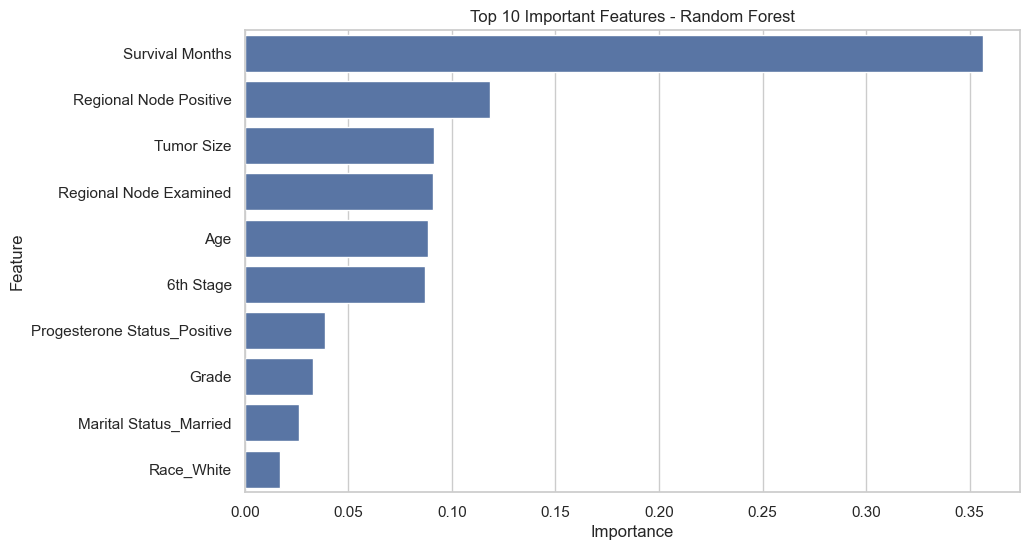

In [54]:
# Random Forest Feature Importances
importances = rf_random.best_estimator_.feature_importances_
feature_names = X_train_smotenc.columns

# Create a dataframe for easier visualization
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

# Display top important features
print(feat_importances.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.show()


Complementary Analysis

In [55]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd

# -------------------------------
# Initial Preprocessing
# -------------------------------

# Drop unwanted columns 
X = df.drop(columns=["Status", 'N Stage', '6th stage','T Stage', 'Survival Months'], errors='ignore')
y = df["Status"]

# Encode target if categorical
if y.dtype.name == 'category' or y.dtype == object:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

# Define remaining categorical columns (only those still in X)
categorical_cols = [col for col in ['Grade'] if col in X.columns]
cat_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Convert boolean columns to float to avoid SMOTENC interpolation issues
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(float)

# -------------------------------
# Repeated Experiment Setup
# -------------------------------
n_runs = 30
balanced_acc_smotenc_list = []
balanced_acc_weighted_list = []

for _ in range(n_runs):
    # -------------------------------
    # Random Train-Test Split (Stratified)
    # -------------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=None
    )

    # Ensure categorical dtypes are preserved
    X_train = X_train.copy()
    X_test = X_test.copy()
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

    # -------------------------------
    # 1. SMOTENC Oversampling
    # -------------------------------
    smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
    X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

    model_smotenc = RandomForestClassifier(random_state=42)
    model_smotenc.fit(X_train_smotenc, y_train_smotenc)

    y_pred_smotenc = model_smotenc.predict(X_test)
    balanced_acc_smotenc_list.append(balanced_accuracy_score(y_test, y_pred_smotenc))

# -------------------------------
# Convert to Arrays for Analysis
# -------------------------------
balanced_acc_smotenc_array = np.array(balanced_acc_smotenc_list)




In [56]:
# --------------------------------------
# 1. RANDOM FOREST CLASSIFIER 
# --------------------------------------

# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score

# --------------------------------------
# Step 1: Split into Train and Validation Sets
# --------------------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X_train_smotenc, y_train_smotenc,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smotenc
)

# --------------------------------------
# Step 2: Define the Random Forest model
# --------------------------------------

rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform Randomized Search Cross-Validation (only on training split)
rf_random = RandomizedSearchCV(
    rf, rf_params, n_iter=10, cv=3, 
    scoring="balanced_accuracy", random_state=42, n_jobs=-1, verbose=1
)

# --------------------------------------
# Step 3: Train the model
# --------------------------------------

rf_random.fit(X_train, y_train)

# --------------------------------------
# Step 4: Predict and Evaluate
# --------------------------------------

# Predict on validation set
y_val_pred = rf_random.predict(X_val)
val_score = balanced_accuracy_score(y_val, y_val_pred)

# Predict on test set
y_test_pred = rf_random.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_test_pred)

# Print results
print(f"Random Forest Validation Balanced Accuracy: {val_score:.4f}")
print(f"Random Forest Test Balanced Accuracy: {test_score:.4f}")
print("Random Forest Best Params:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Validation Balanced Accuracy: 0.8970
Random Forest Test Balanced Accuracy: 0.6118
Random Forest Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}



Confusion Matrix for Train Set:
               Predicted 0    Predicted 1
Actual 0             2173             0
Actual 1                1          2173

Confusion Matrix for Validation Set:
               Predicted 0    Predicted 1
Actual 0              482            62
Actual 1               50           493

Confusion Matrix for Test Set:
               Predicted 0    Predicted 1
Actual 0              621            58
Actual 1               85            38


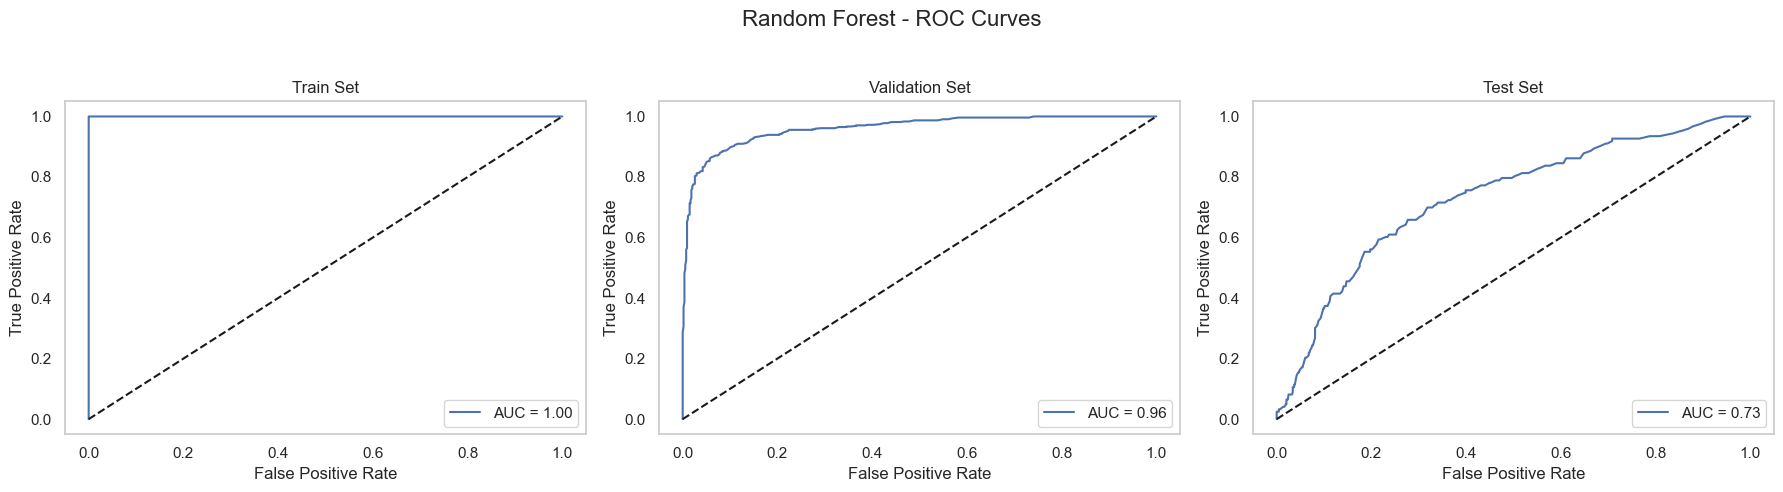

--- Random Forest Train Set ---
Accuracy: 0.9998
Sensitivity: 0.9995
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000
F1 Score: 0.9998

--- Random Forest Validation Set ---
Accuracy: 0.8970
Sensitivity: 0.9079
Specificity: 0.8860
Precision: 0.8883
AUC: 0.9609
F1 Score: 0.8980

--- Random Forest Test Set ---
Accuracy: 0.8217
Sensitivity: 0.3089
Specificity: 0.9146
Precision: 0.3958
AUC: 0.7322
F1 Score: 0.3470



In [57]:
### --------------------------------------
# Example for Random Forest - ROC Curves and Metrics
# --------------------------------------

from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


# First, predict probabilities 
rf_probs_train = rf_random.predict_proba(X_train)[:, 1]
rf_probs_val = rf_random.predict_proba(X_val)[:, 1]
rf_probs_test = rf_random.predict_proba(X_test)[:, 1]

# Predict labels (already done for val/test — but needed for train)
y_train_pred = rf_random.predict(X_train)

# Now plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Random Forest - ROC Curves", fontsize=16)

metrics_train_rf = evaluate_model_subplot(axes[0], y_train, y_train_pred, rf_probs_train, title="Train Set")
metrics_val_rf = evaluate_model_subplot(axes[1], y_val, y_val_pred, rf_probs_val, title="Validation Set")
metrics_test_rf = evaluate_model_subplot(axes[2], y_test, y_test_pred, rf_probs_test, title="Test Set")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display the metrics neatly
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train_rf, metrics_val_rf, metrics_test_rf]):
    print(f"--- Random Forest {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()


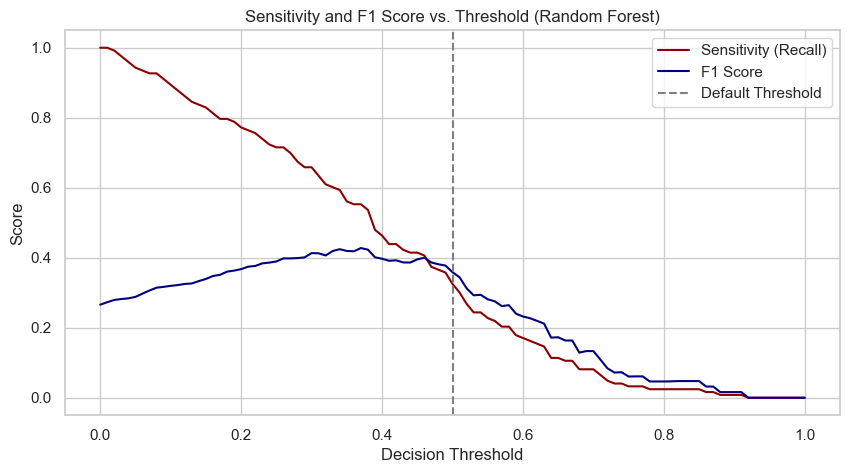

In [58]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Predict probabilities instead of hard predictions
rf_probs_test = rf_random.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Step 5: Search for best threshold based on recall vs. precision tradeoff
thresholds = np.linspace(0, 1, 101)
sensitivity_scores = []
f1_scores = []

for threshold in thresholds:
    preds = (rf_probs_test >= threshold).astype(int)
    sensitivity_scores.append(recall_score(y_test, preds))
    f1_scores.append(f1_score(y_test, preds))

# Plot sensitivity vs. threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, sensitivity_scores, label="Sensitivity (Recall)", color='darkred')
plt.plot(thresholds, f1_scores, label="F1 Score", color='navy')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Sensitivity and F1 Score vs. Threshold (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


In [60]:
chosen_threshold = 0.1
y_test_custom = (rf_probs_test >= chosen_threshold).astype(int)

print("Custom Threshold Metrics:")
print("Sensitivity:", recall_score(y_test, y_test_custom))
print("Precision:", precision_score(y_test, y_test_custom))
print("F1 Score:", f1_score(y_test, y_test_custom))
print("AUC:", roc_auc_score(y_test, rf_probs_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_custom))


Custom Threshold Metrics:
Sensitivity: 0.8943089430894309
Precision: 0.19469026548672566
F1 Score: 0.31976744186046513
AUC: 0.7322102087000252
Confusion Matrix:
 [[224 455]
 [ 13 110]]



Confusion Matrix for Train Set:
               Predicted 0    Predicted 1
Actual 0             2173             0
Actual 1                1          2173

Confusion Matrix for Validation Set:
               Predicted 0    Predicted 1
Actual 0              482            62
Actual 1               50           493

Confusion Matrix for Test Set:
               Predicted 0    Predicted 1
Actual 0              621            58
Actual 1               85            38


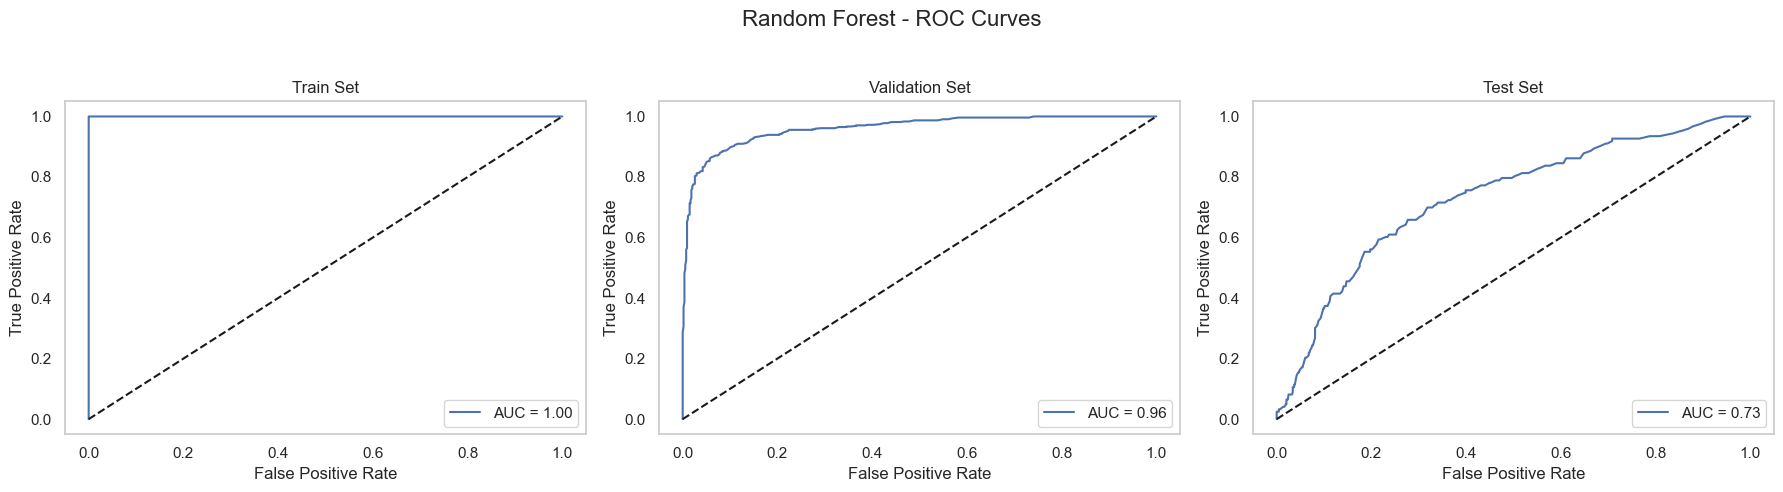

--- Random Forest Train Set ---
Accuracy: 0.9998
Sensitivity: 0.9995
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000
F1 Score: 0.9998

--- Random Forest Validation Set ---
Accuracy: 0.8970
Sensitivity: 0.9079
Specificity: 0.8860
Precision: 0.8883
AUC: 0.9609
F1 Score: 0.8980

--- Random Forest Test Set ---
Accuracy: 0.8217
Sensitivity: 0.3089
Specificity: 0.9146
Precision: 0.3958
AUC: 0.7322
F1 Score: 0.3470



In [61]:
### --------------------------------------
# Example for Random Forest - ROC Curves and Metrics
# --------------------------------------

from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


# First, predict probabilities 
rf_probs_train = rf_random.predict_proba(X_train)[:, 1]
rf_probs_val = rf_random.predict_proba(X_val)[:, 1]
rf_probs_test = rf_random.predict_proba(X_test)[:, 1]

# Predict labels (already done for val/test — but needed for train)
y_train_pred = rf_random.predict(X_train)

# Now plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Random Forest - ROC Curves", fontsize=16)

metrics_train_rf = evaluate_model_subplot(axes[0], y_train, y_train_pred, rf_probs_train, title="Train Set")
metrics_val_rf = evaluate_model_subplot(axes[1], y_val, y_val_pred, rf_probs_val, title="Validation Set")
metrics_test_rf = evaluate_model_subplot(axes[2], y_test, y_test_pred, rf_probs_test, title="Test Set")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display the metrics neatly
for name, metrics in zip(["Train", "Validation", "Test"], [metrics_train_rf, metrics_val_rf, metrics_test_rf]):
    print(f"--- Random Forest {name} Set ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print()